In [3]:
import glob
import statmorph
import photutils
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.io import fits
import scipy.ndimage as ndi
from astropy.wcs import WCS
from scipy import stats
from math import *
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from astropy.nddata import Cutout2D
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from matplotlib.patches import Rectangle, Ellipse, Circle
from astropy.visualization import simple_norm, ZScaleInterval, MinMaxInterval
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
from astropy.visualization.stretch import LinearStretch, LogStretch, SqrtStretch
from statmorph.utils.image_diagnostics import make_figure
import warnings
from astropy.wcs import FITSFixedWarning
warnings.filterwarnings('ignore', category=FITSFixedWarning)
from astropy.coordinates import Angle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.cosmology import FlatLambdaCDM
from regions import PixCoord
from regions import CircleAnnulusSkyRegion, CircleAnnulusPixelRegion
from regions import CircleSkyRegion, CirclePixelRegion
from ast import literal_eval
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
import matplotlib
plt.style.use(['classic'])
import pickle
from astropy.wcs.utils import skycoord_to_pixel
import ast
from matplotlib import animation
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from pylab import figure, cm
from photutils.aperture import SkyCircularAperture
from photutils.aperture import aperture_photometry
from os.path import exists
# plt.rcParams.update({'figure.max_open_warning': 1000
from astropy.stats import sigma_clip
from astropy.stats import sigma_clipped_stats
from statmorph.utils.image_diagnostics import make_figure
# from petrofit.segmentation import make_catalog, plot_segments
# from petrofit.photometry import order_cat
# from petrofit.utils import plot_target
# from petrofit.photometry import make_radius_list
# from petrofit.photometry import source_photometry

In [4]:
%matplotlib inline

In [5]:
alma_img_path = "/Users/arames52/Research/Data/CASA_Outputs/Natural/fits/"
fits_files = sorted(glob.glob(alma_img_path + "*.fits"))

# Cutouts of ALMA Images

In [6]:
def read_alma_fits(file):
    hdu = fits.open(file)[0]
    data = hdu.data[0,0,:,:]
    data = np.nan_to_num(data)
    header = hdu.header
    wcs = WCS(header, naxis = 2)
    
    return data, header, wcs

In [7]:
weak_detections =  ["CDFS19", "ES1-35", "ES1_z_0.88"]
good_detections = ["CDFS-18", "ES1-18", "ES1-25", "ES1_z_0.99","ES1_z_0.99b","ES1_z_1.04","ES1_z_1.38","ES1_z_1.40",
"ES1_z_1.60", "ES1_z_1.65", "ES1_z_1.70", "XMM-113", "XMM-11", "XMM-29", "XMM-30", "XMM_z_0.9", "XMM_z_1.0"]
detections = weak_detections + good_detections

In [8]:
test_detections = ['CDFS-18', 'ES1_z_1.65', 'ES1_z_1.70', 'ES1_z_1.40', 'ES1_z_1.38']

In [9]:
n_s = {}
re_s = {}
rhalf_circ = {}
rhalf_ellip = {}

/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


CDFS-18
0.5179019866005882
0.3234975053894542


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


ELAIS-S1-18
0.9002345508799647
0.6375616734493176
ELAIS-S1-25


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


0.6781883197460971
0.6540715766067476
ES1_z_0.99


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


1.1065358191299752
0.7579062011945739
ES1_z_0.99b


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


1.256732527307191
0.715937344837993


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


ES1_z_1.04


1.2342332898090087
0.7519552791900564


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


ES1_z_1.38
0.8945777502916166
0.38222974623469225
ES1_z_1.4


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


0.9469568204861813
0.4521006836058428


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


ES1_z_1.6
0.9123912172607288
0.46106166378148244


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


ES1_z_1.65
0.7846573903318719
0.3854347909071755


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


ES1_z_1.7
0.5848343008633149
0.4927124369030017


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


XMM-113


1.4695448411624599
0.7675726241300571


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


XMM-11
0.536524794569366
0.9393442683846545
XMM-29


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


0.6406118715085923
0.6059615873675769
XMM-30


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


0.38932682385435996
0.50922092983053
XMM_z_0.9


/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)
/var/folders/vp/yhfll2qd0fgc3wnbgyc1yhyr0000gp/T/ipykernel_21408/3615261092.py:29: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  segm = photutils.detect_sources(final_image, threshold, npixels = 8)


1.0142861218145889
1.0586613861094503
XMM_z_1.0
0.6654110814543707
0.3571895657710463


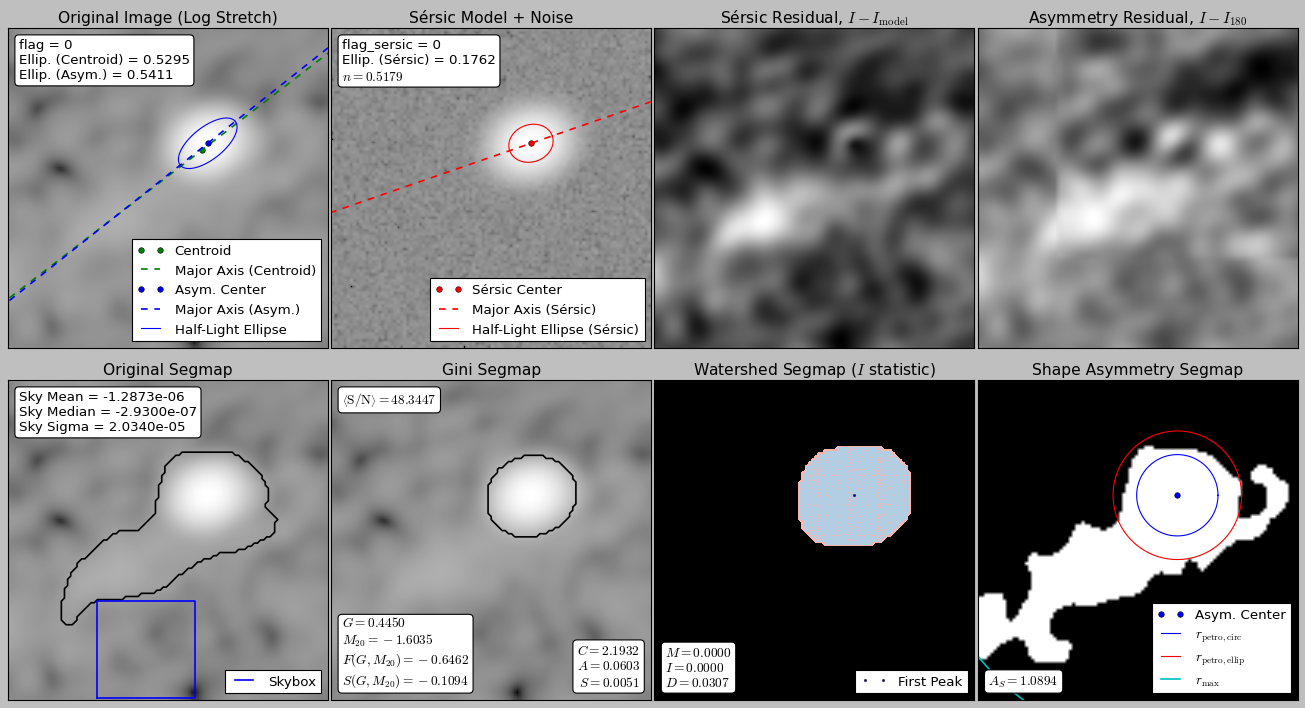

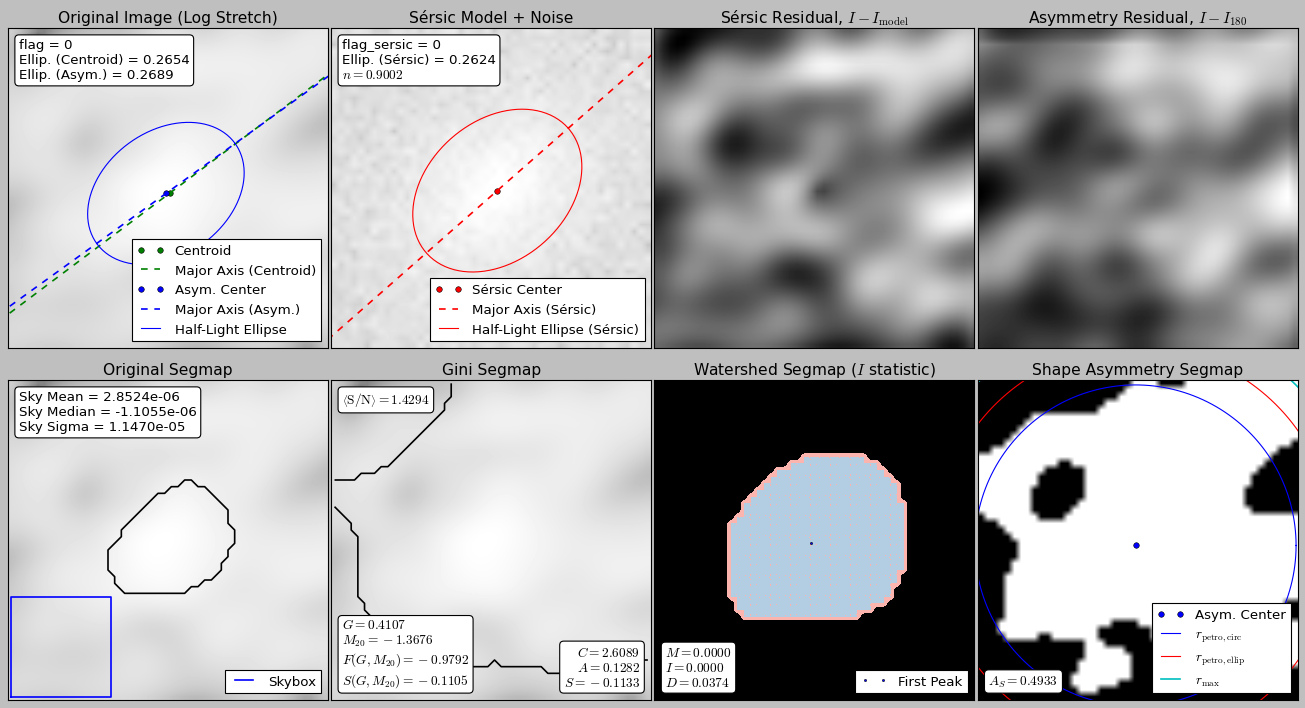

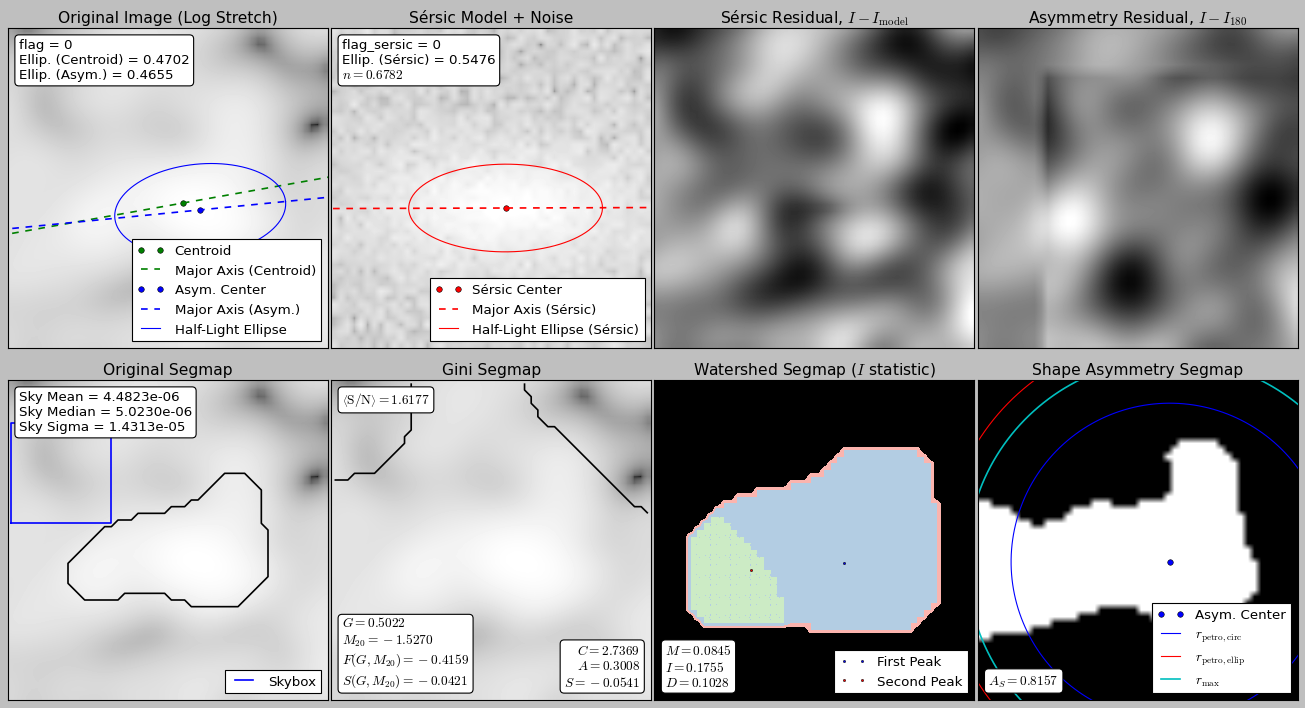

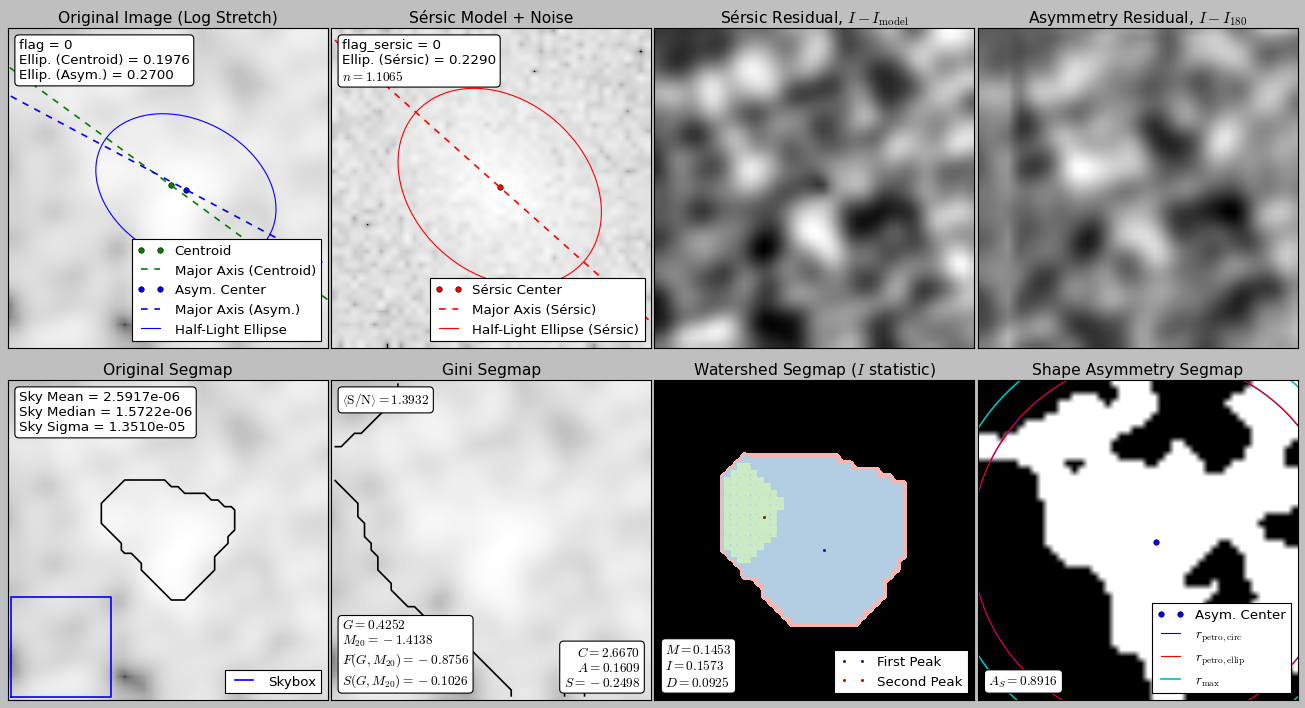

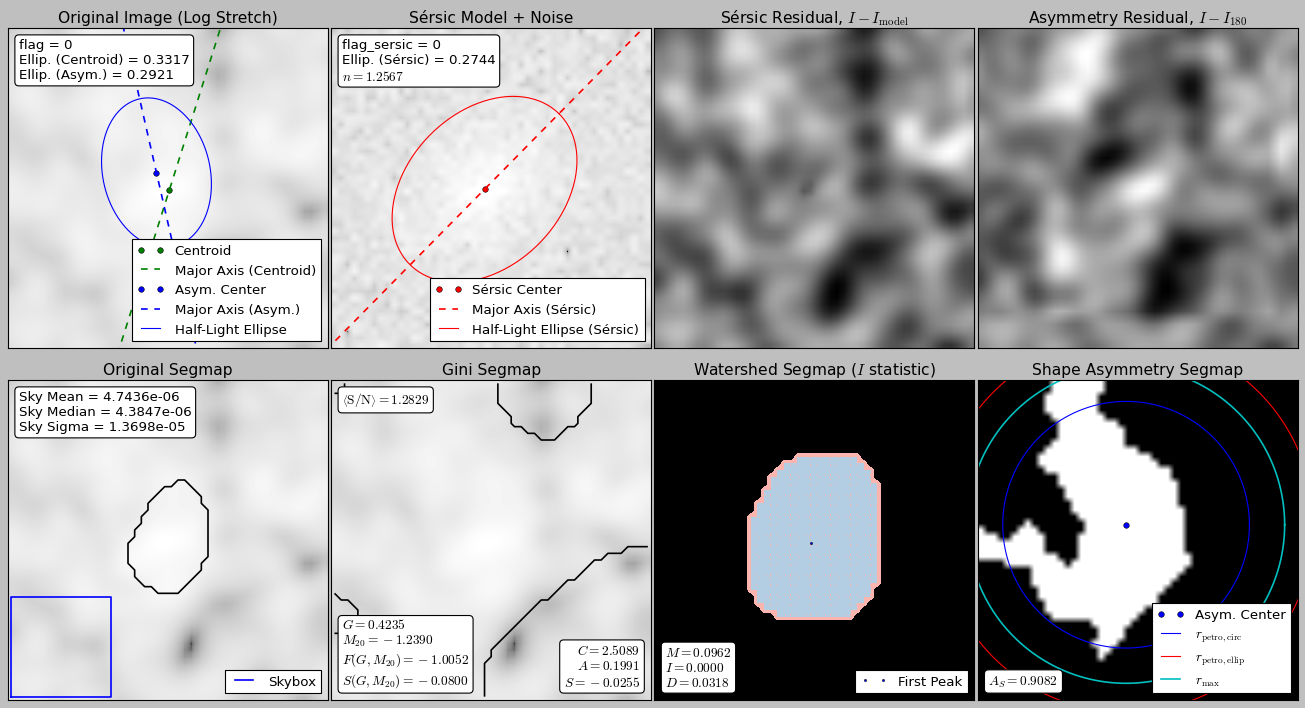

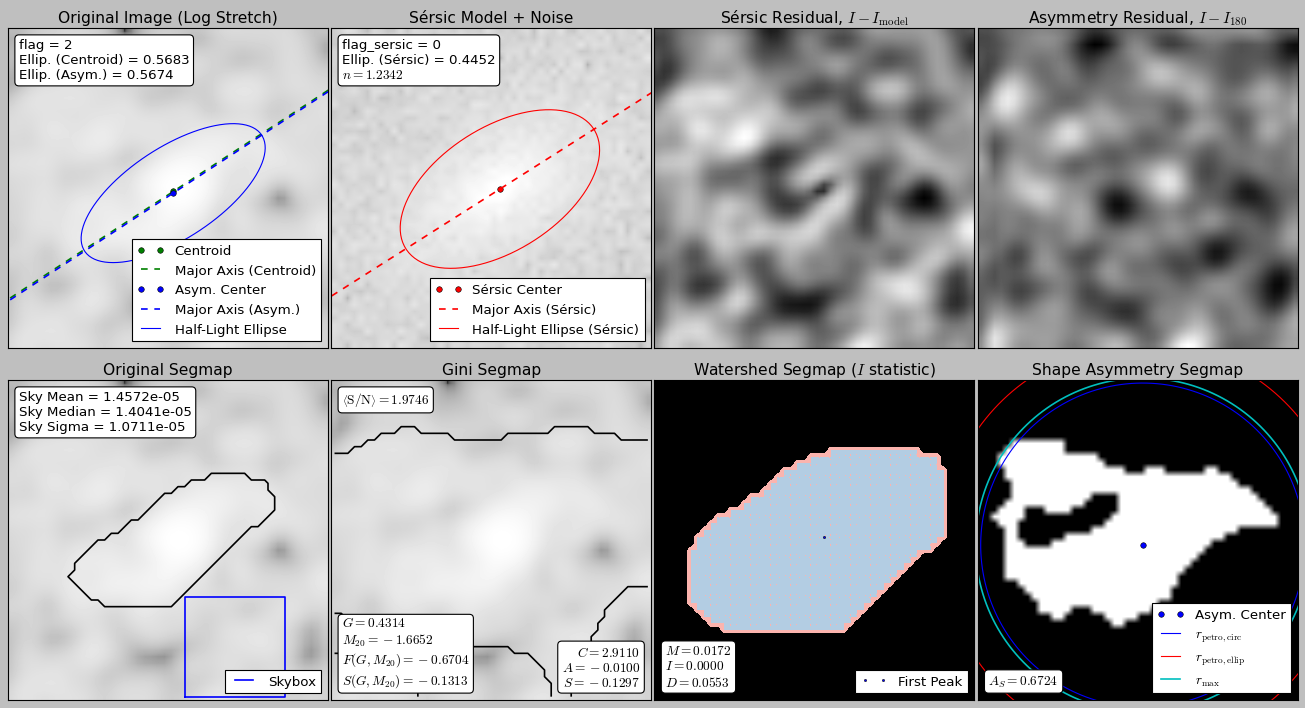

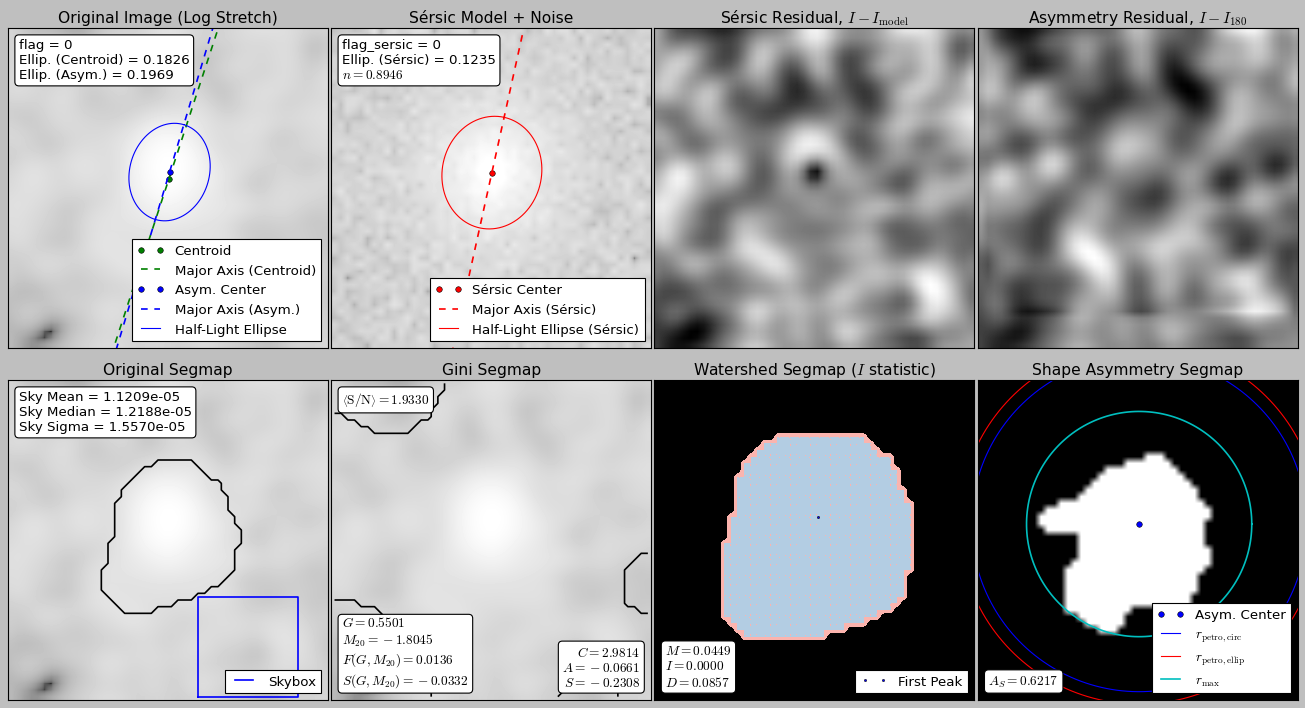

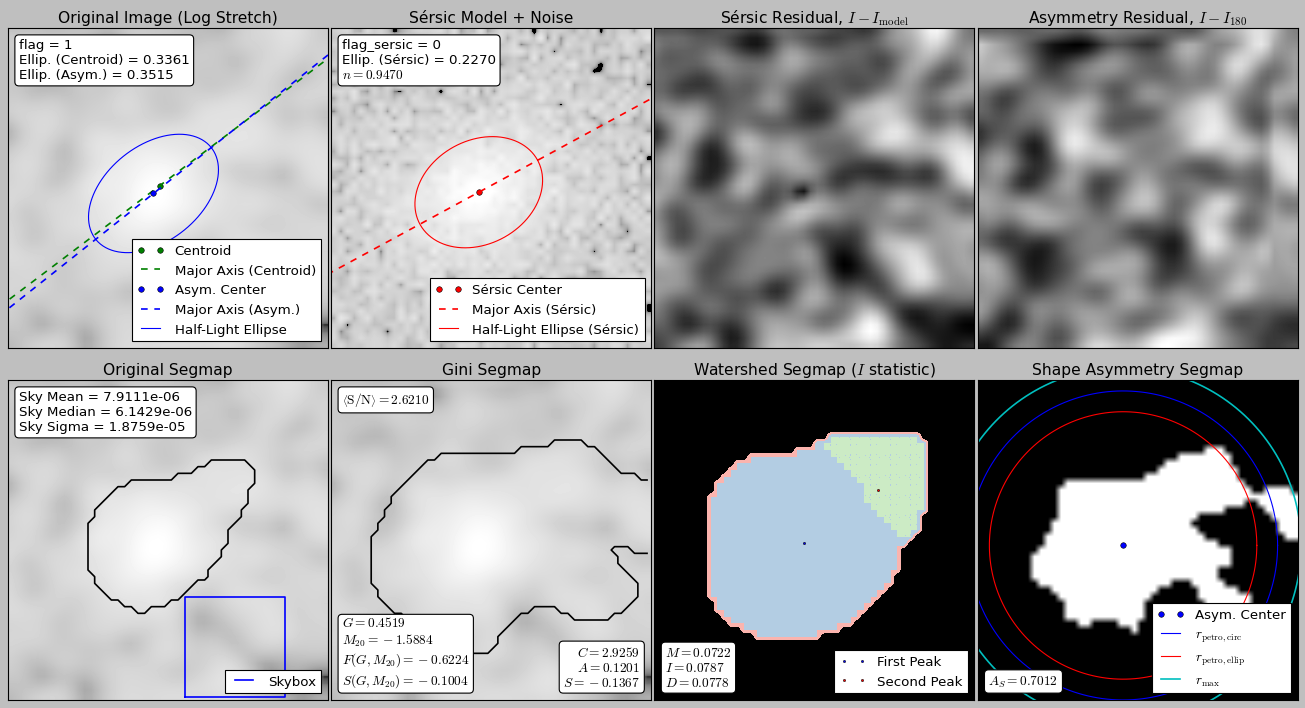

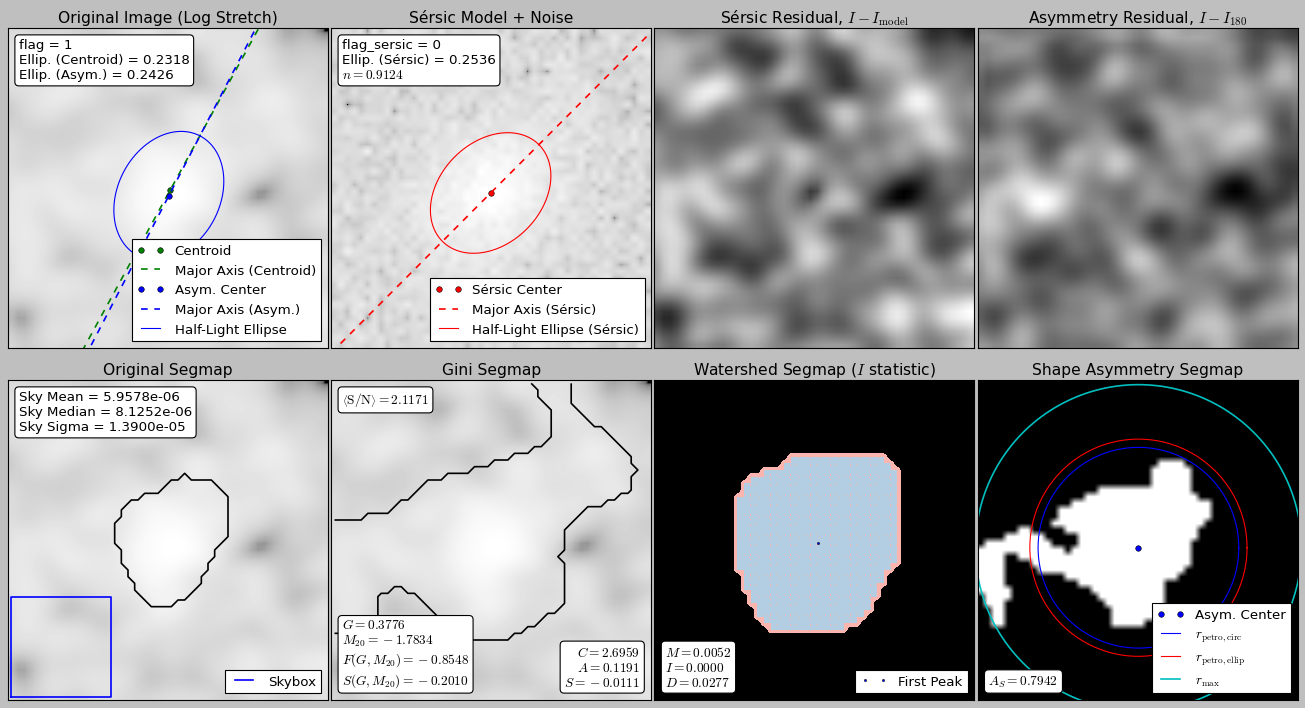

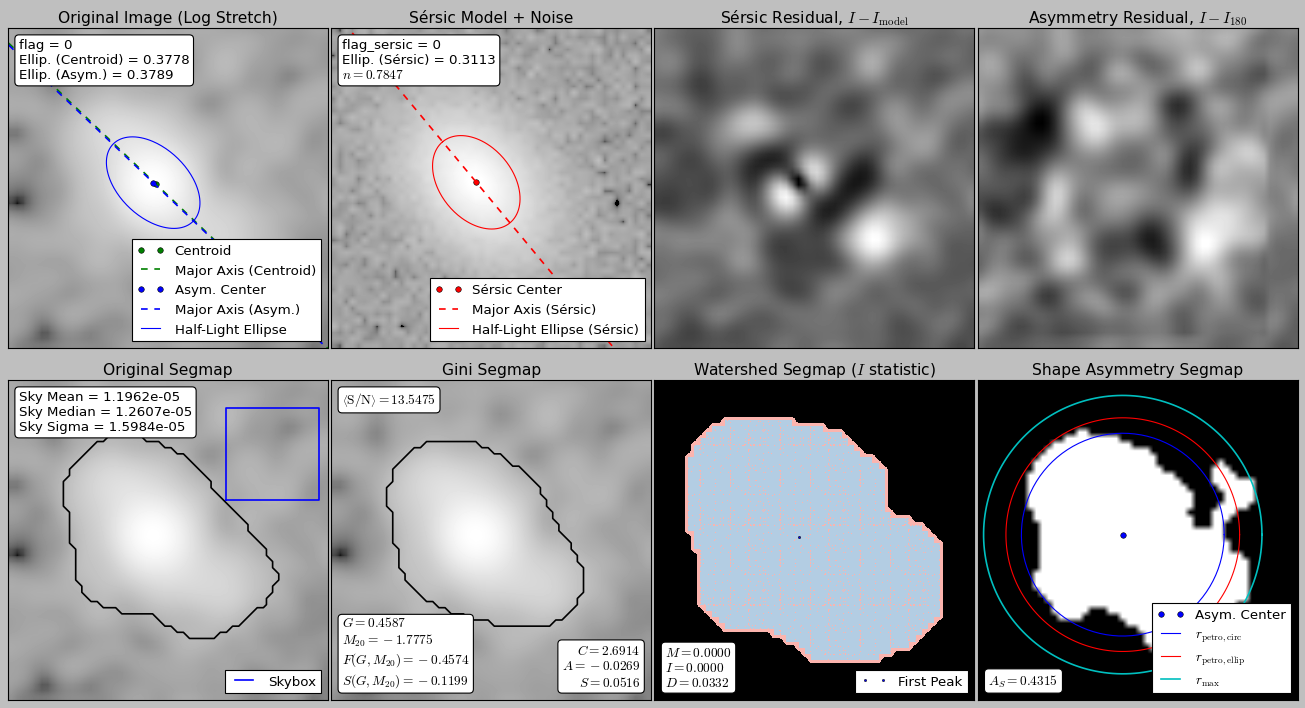

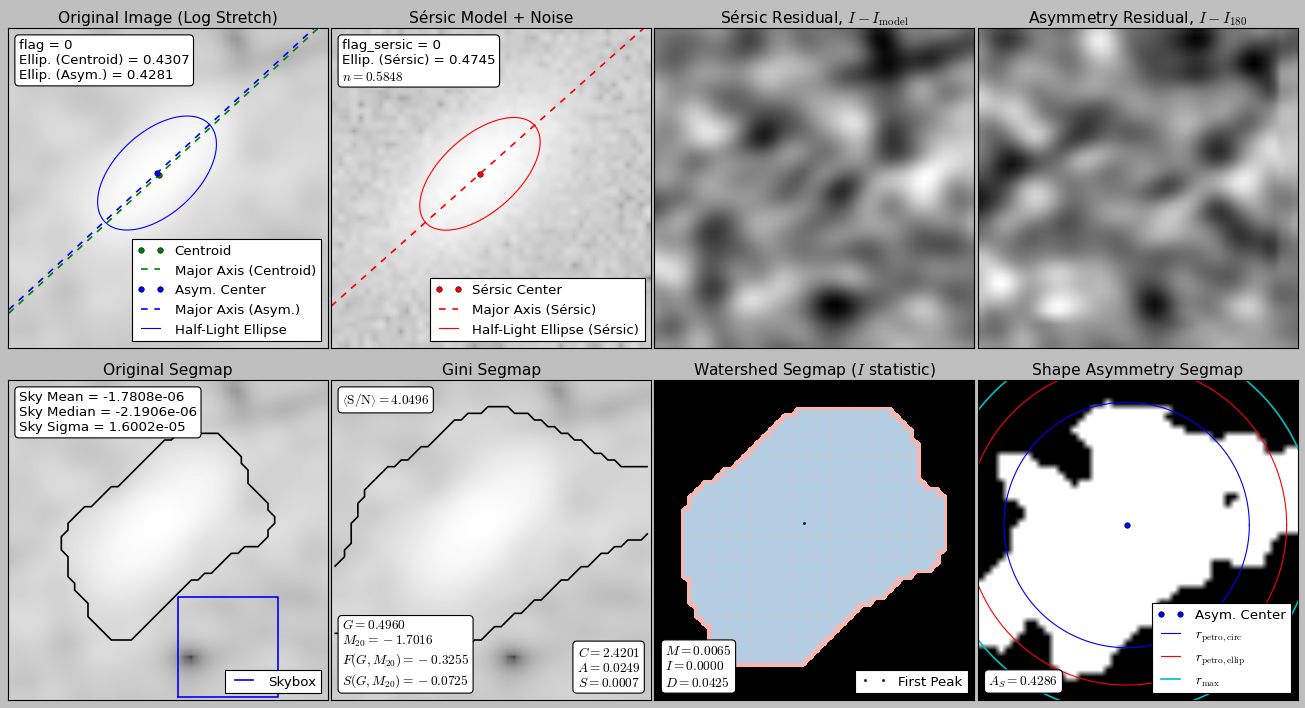

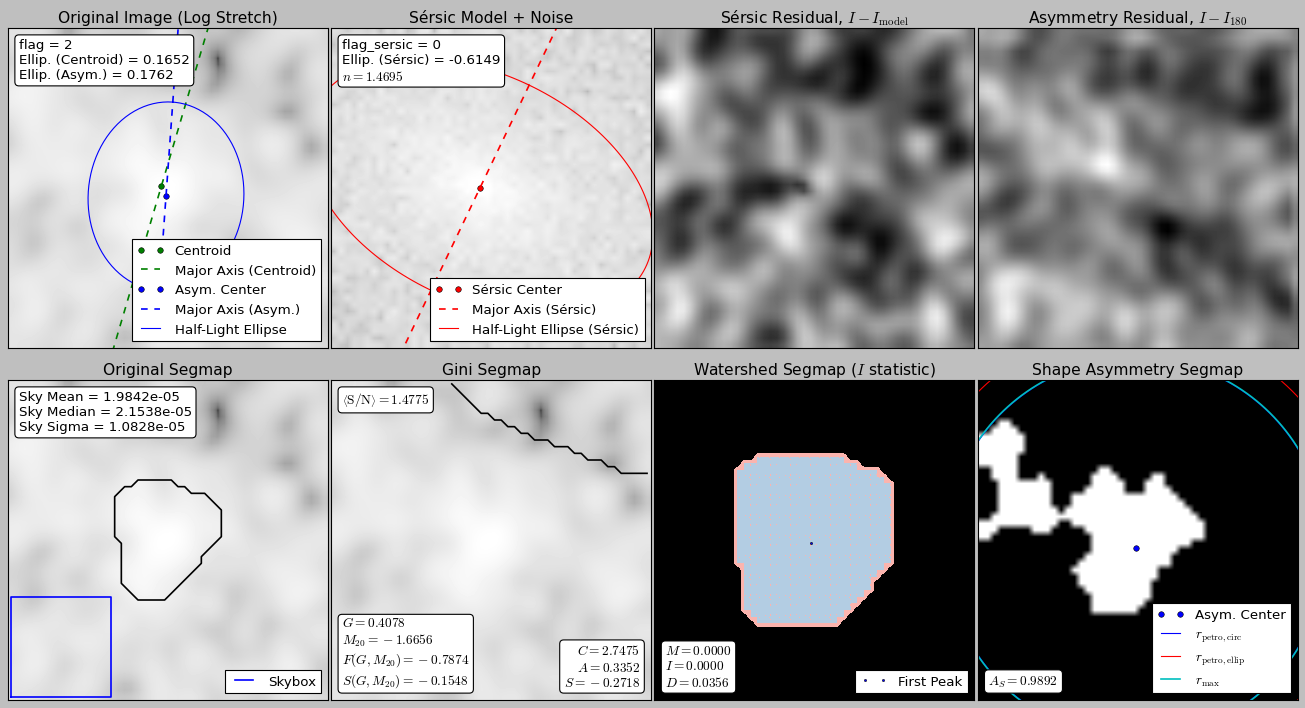

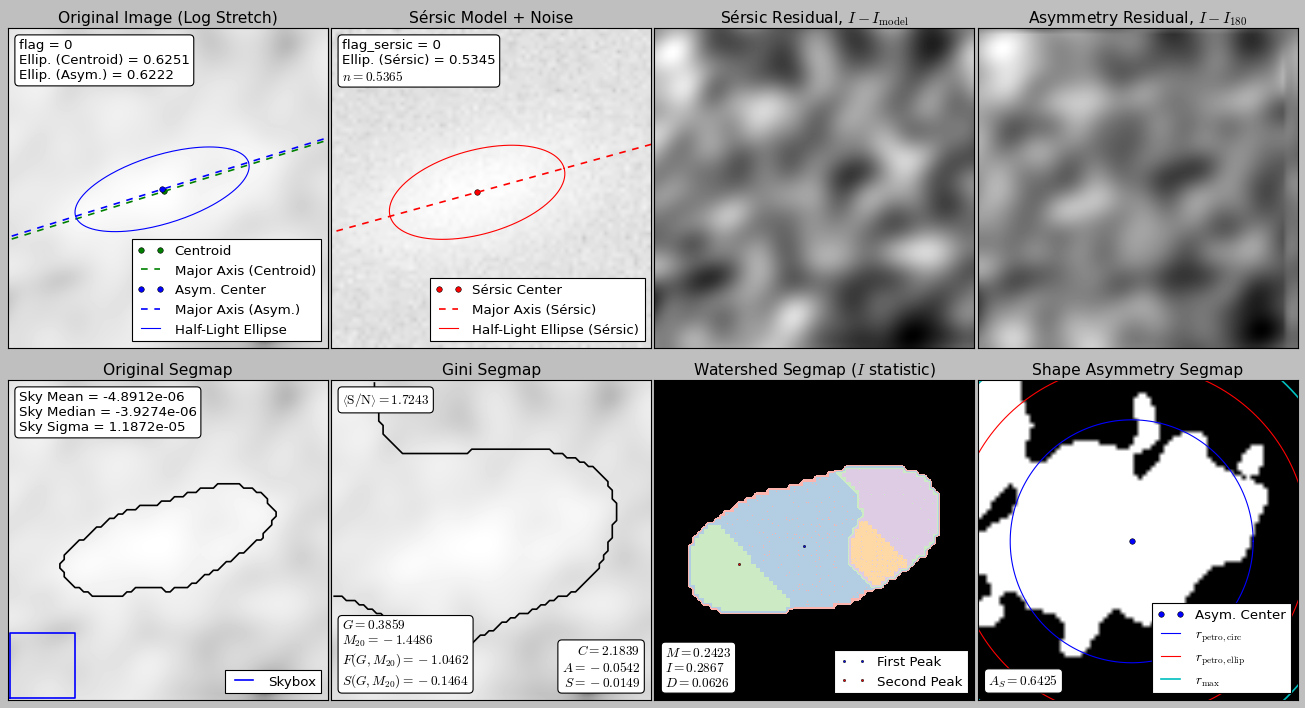

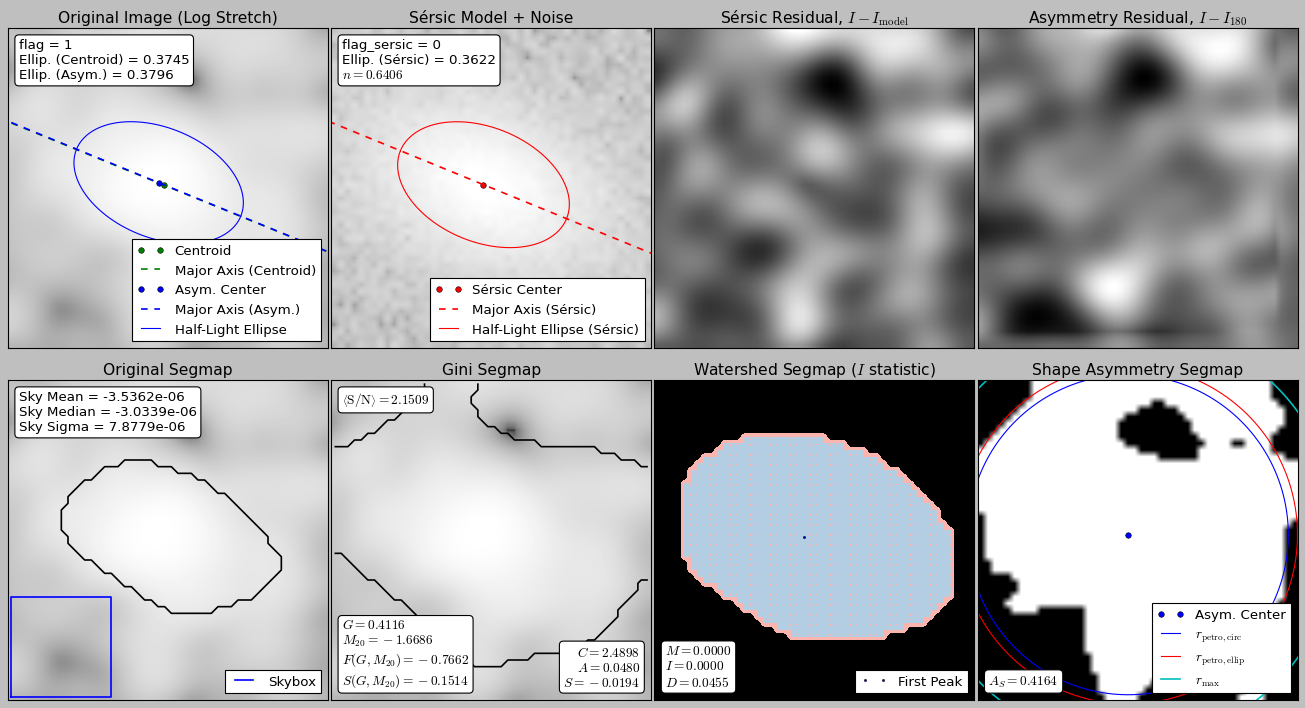

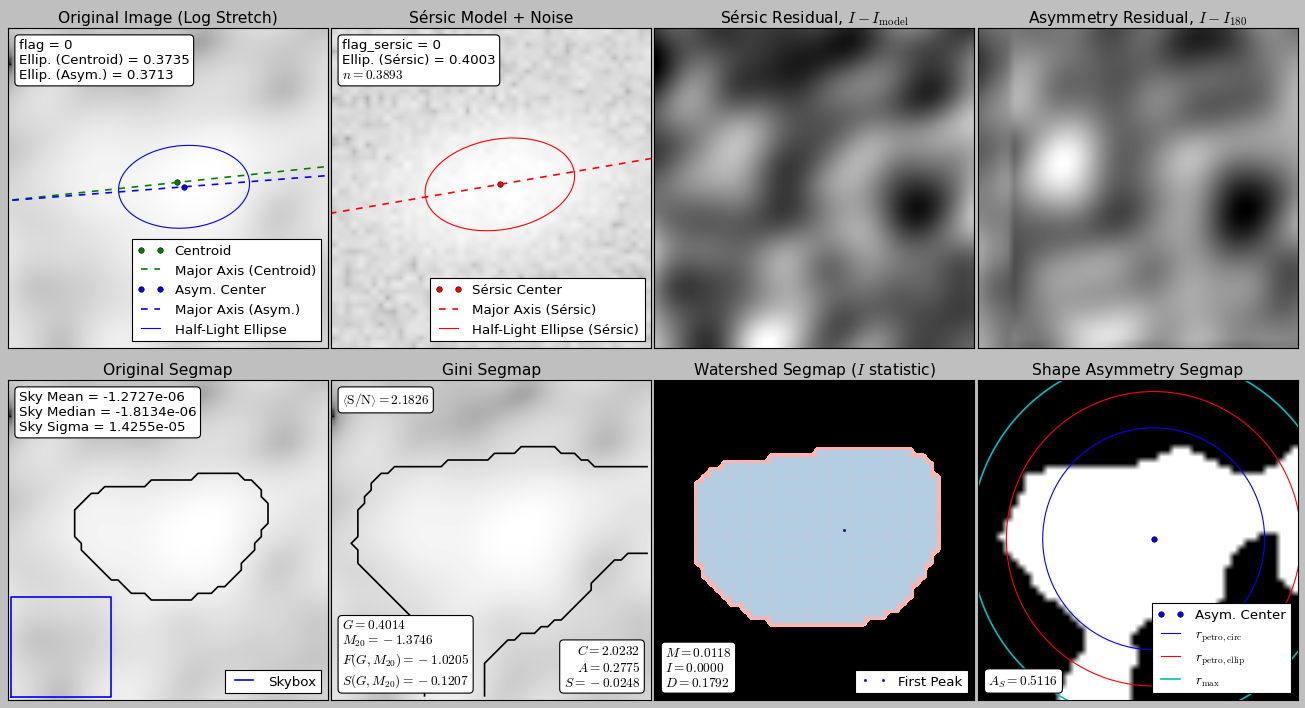

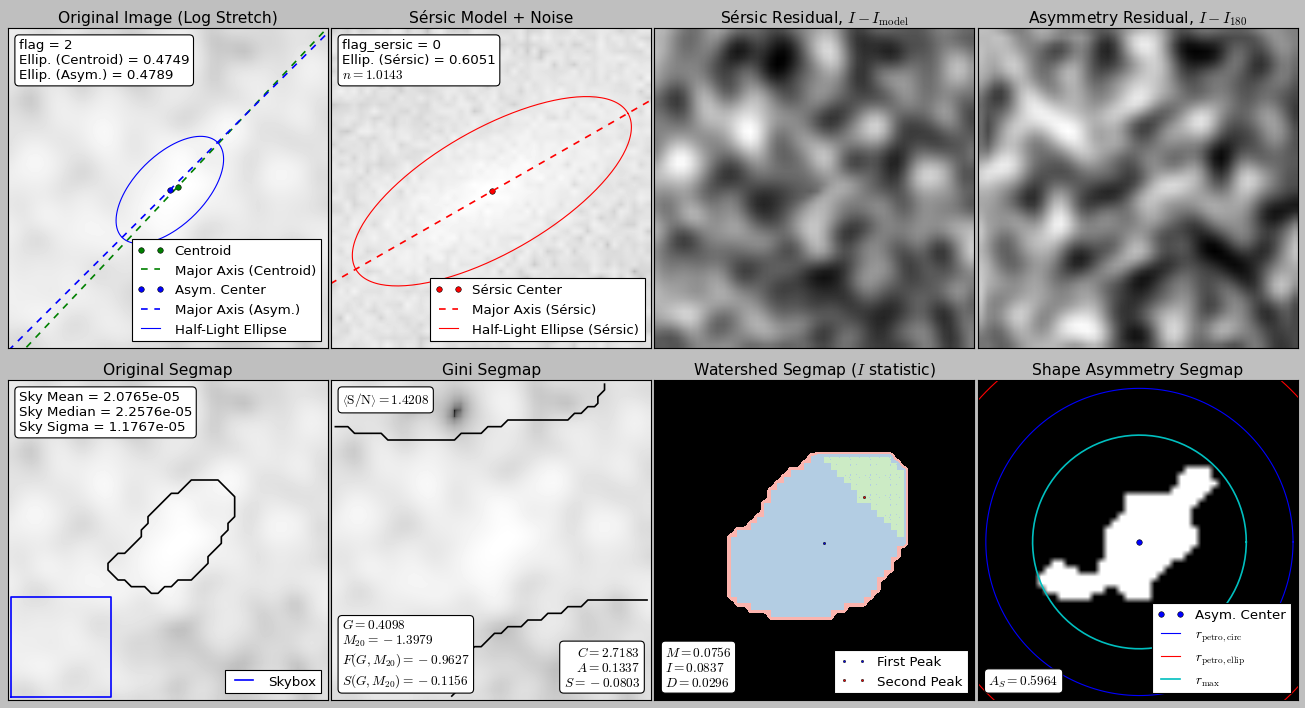

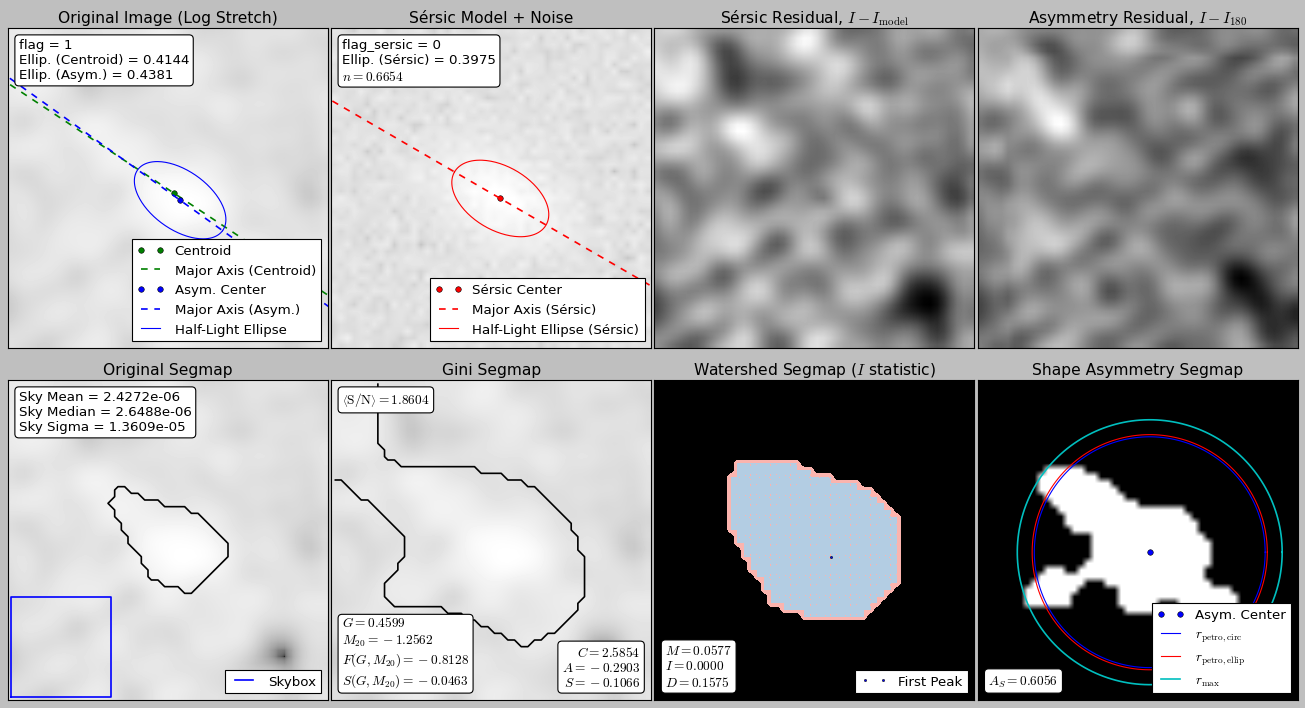

In [10]:
for i in range(len(good_detections)):
    bcg = good_detections[i]
    alma_image = glob.glob(alma_img_path + bcg + "*.fits")[0]  
    alma_data, alma_header, alma_wcs = read_alma_fits(alma_image)
    ra = alma_header['CRVAL1']
    dec = alma_header['CRVAL2']
    position = SkyCoord(ra, dec, frame = 'fk5', unit = 'degree')
    s = (10,10)
    size = u.Quantity(s, u.arcsec)
    cutout = Cutout2D(alma_data, position = position, size = size, wcs = alma_wcs)
    alma_cutout = cutout.data
    cutout_bbox = cutout.bbox_original
    xlim = cutout_bbox[0]
    ylim = cutout_bbox[1]
    final_image = alma_data[xlim[0]:xlim[1], ylim[0]:ylim[1]]

    alma_mean, alma_median, alma_stddev = sigma_clipped_stats(final_image, sigma=3)
    threshold = 2 * alma_stddev

    bmaj = alma_header['BMAJ']*u.deg
    bmin = alma_header['BMIN']*u.deg
    bpa = u.Quantity(alma_header['BPA'], unit = "deg")
    cdelt = alma_header['CDELT2']*u.deg
    x_sigma = bmin/cdelt
    y_sigma = bmaj/cdelt
    alma_psf = Gaussian2DKernel(x_stddev=gaussian_fwhm_to_sigma*x_sigma, y_stddev=gaussian_fwhm_to_sigma*y_sigma, theta = bpa, x_size = final_image.shape[0], y_size = final_image.shape[1]).array.value


    segm = photutils.detect_sources(final_image, threshold, npixels = 8)
    label = np.argmax(segm.areas) + 1
    segmap = segm.data == label
    segmap_float = ndi.uniform_filter(np.float64(segmap), size=10)
    segmap = np.int64(segmap_float > 0.5)


    alma_rms = np.full(final_image.shape, alma_stddev)
    print(alma_header['OBJECT'])
    source_morphs = statmorph.source_morphology(final_image, segmap, weightmap = alma_rms)
    morph = source_morphs[0]
    print(morph.sersic_n)
    print(morph.sersic_rhalf * 0.045)
    fig = make_figure(morph)
    
    n_s[bcg] = morph.sersic_n
    re_s[bcg] = morph.sersic_rhalf * 0.045
    rhalf_circ[bcg] = morph.rhalf_circ * 0.045
    rhalf_ellip[bcg] = morph.rhalf_ellip * 0.045
    
#     fig.savefig(bcg + "_sersic.jpg", dpi = 300)

In [11]:
re_s["XMM-113"] = 0.74
n_s["XMM-113"] = 2.09
re_s['ES1_z_1.70'] = 0.4382
n_s["ES1_z_1.70"] = 0.4852

In [12]:
re_s, n_s

({'CDFS-18': 0.3234975053894542,
  'ES1-18': 0.6375616734493176,
  'ES1-25': 0.6540715766067476,
  'ES1_z_0.99': 0.7579062011945739,
  'ES1_z_0.99b': 0.715937344837993,
  'ES1_z_1.04': 0.7519552791900564,
  'ES1_z_1.38': 0.38222974623469225,
  'ES1_z_1.40': 0.4521006836058428,
  'ES1_z_1.60': 0.46106166378148244,
  'ES1_z_1.65': 0.3854347909071755,
  'ES1_z_1.70': 0.4382,
  'XMM-113': 0.74,
  'XMM-11': 0.9393442683846545,
  'XMM-29': 0.6059615873675769,
  'XMM-30': 0.50922092983053,
  'XMM_z_0.9': 1.0586613861094503,
  'XMM_z_1.0': 0.3571895657710463},
 {'CDFS-18': 0.5179019866005882,
  'ES1-18': 0.9002345508799647,
  'ES1-25': 0.6781883197460971,
  'ES1_z_0.99': 1.1065358191299752,
  'ES1_z_0.99b': 1.256732527307191,
  'ES1_z_1.04': 1.2342332898090087,
  'ES1_z_1.38': 0.8945777502916166,
  'ES1_z_1.40': 0.9469568204861813,
  'ES1_z_1.60': 0.9123912172607288,
  'ES1_z_1.65': 0.7846573903318719,
  'ES1_z_1.70': 0.4852,
  'XMM-113': 2.09,
  'XMM-11': 0.536524794569366,
  'XMM-29': 0.6406

In [96]:
%store re_s
%store n_s

Stored 're_s' (dict)
Stored 'n_s' (dict)


# Plots

In [97]:
redshift = pd.read_csv("/Users/arames52/Research/Data/redshift.csv")

In [98]:
redshift_dict = {}
for ind, row in redshift.iterrows():
    redshift_dict[row['bcg']] = row['redshift']

In [99]:
%store -r gaussian_effective_radius

In [100]:
gaussian_re_kpc = {}
sersic_re_kpc = {}

for bcg in good_detections:
    gaussian_re_kpc[bcg] = cosmo.kpc_proper_per_arcmin(redshift_dict[bcg])*(gaussian_effective_radius[bcg]/60)
    sersic_re_kpc[bcg] = cosmo.kpc_proper_per_arcmin(redshift_dict[bcg])*(re_s[bcg]/60)

In [101]:
bcgs = good_detections
with open("/Users/arames52/Research/Analysis/IMSTAT/SN_dict.pkl", "rb") as f:
    sn_dict = pickle.load(f)
sn_dict_natural = {}
for key in good_detections:
    sn_dict_natural[key] = sn_dict[key]['natural']
all_bcgs = []
s_re_kpc = []
sersic_n = []
signal_to_noise = []
for re in sorted(sersic_re_kpc.items()):
    s_re_kpc.append(re[1].value)
g_re_kpc = []
for re in sorted(gaussian_re_kpc.items()):
    g_re_kpc.append(re[1].value)
    all_bcgs.append(re[0])
for sn in sorted(sn_dict_natural.items()):
    signal_to_noise.append(sn[1])
for n in sorted(n_s.items()):
    sersic_n.append(n[1])

In [102]:
sersic_n

[0.5179019866005882,
 0.9002345508799647,
 0.6781883197460971,
 1.1065358191299752,
 1.256732527307191,
 1.2342332898090087,
 0.8945777502916166,
 0.9469568204861813,
 0.9123912172607288,
 0.7846573903318719,
 0.4852,
 0.536524794569366,
 2.09,
 0.6406118715085923,
 0.38932682385435996,
 1.0142861218145889,
 0.6654110814543707]

(0.0, 1.6)

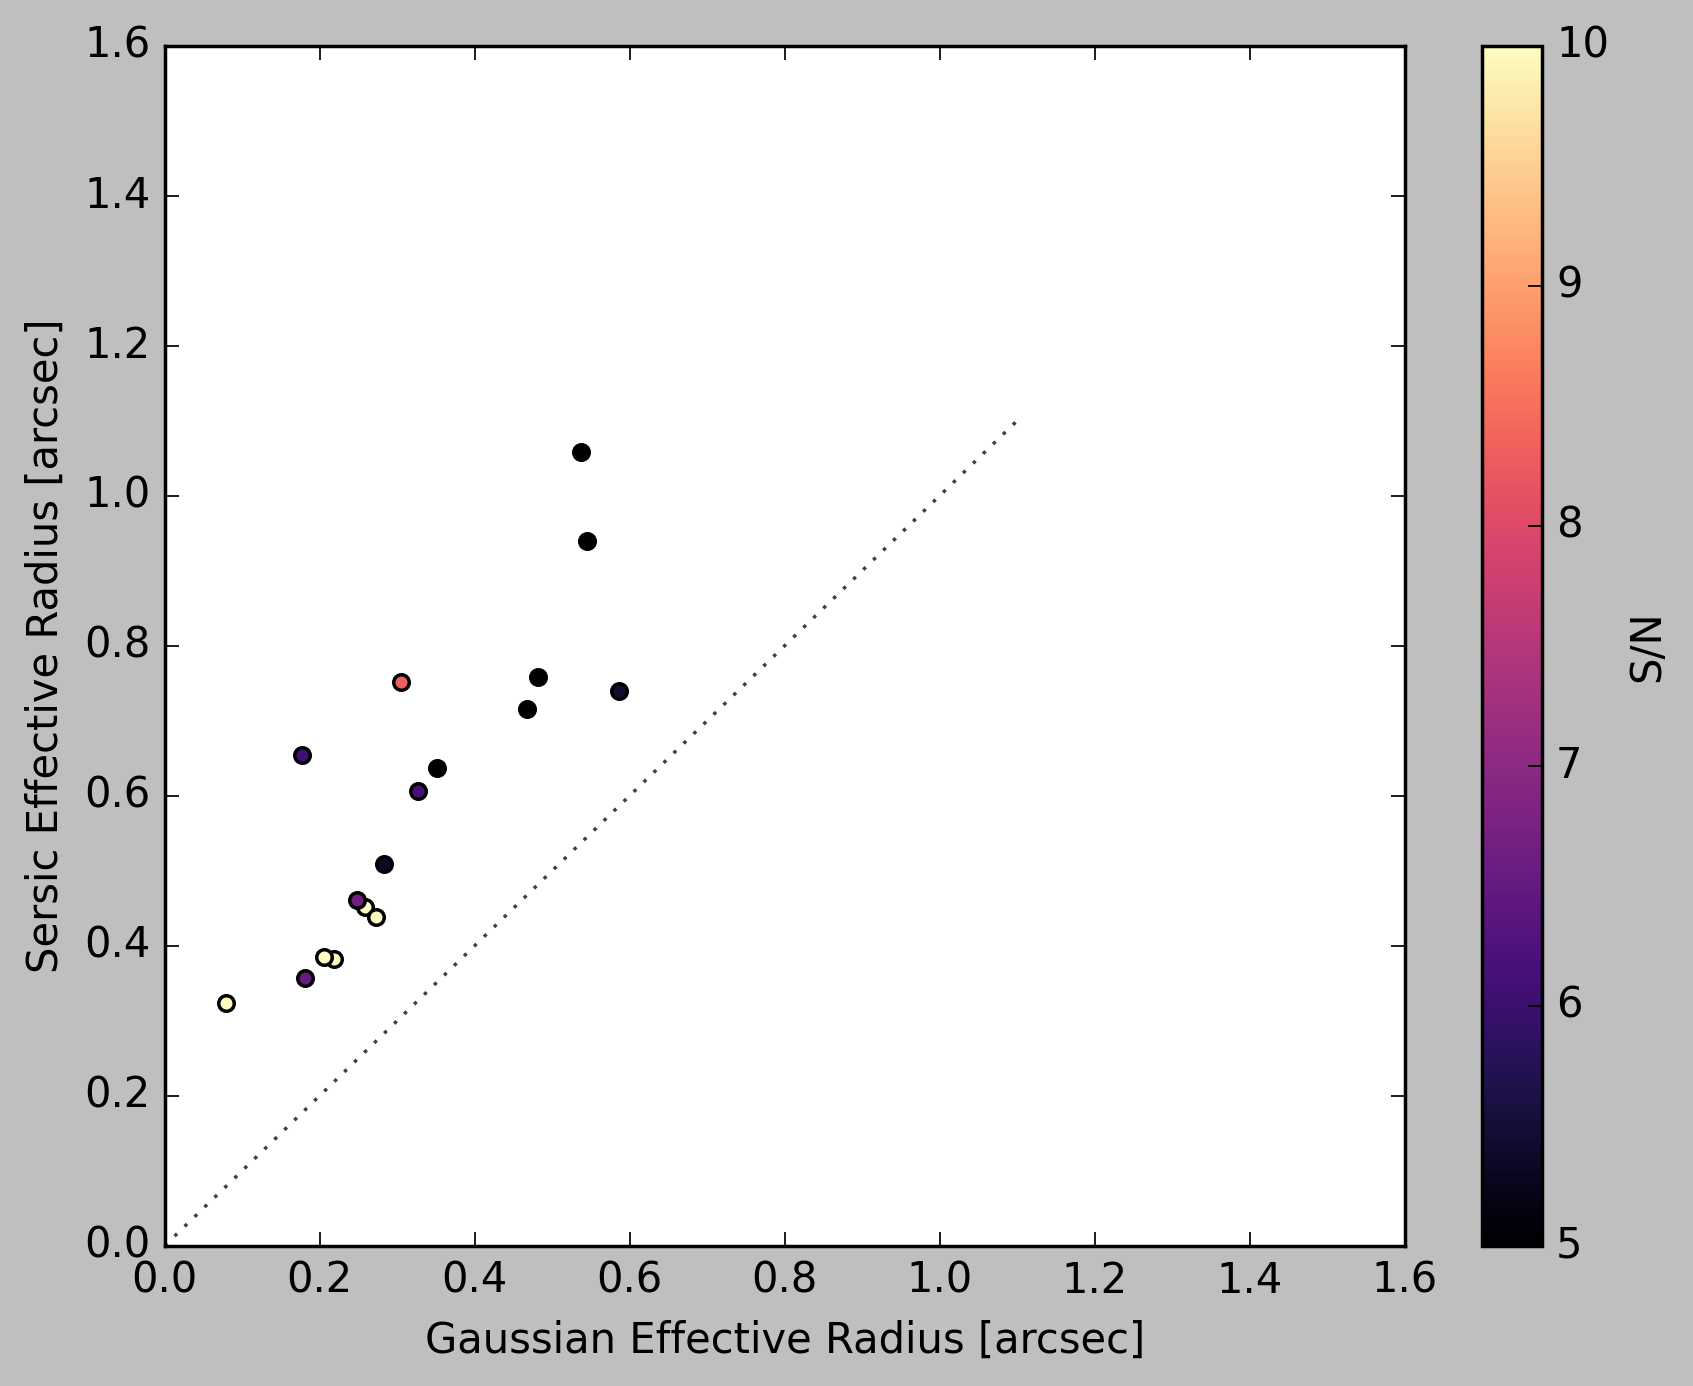

In [103]:
fig,ax = plt.subplots(1,1, dpi = 250)
vmin = 5
vmax = 10
for bcg in bcgs:
    im = ax.scatter(gaussian_effective_radius[bcg], re_s[bcg], c = sn_dict_natural[bcg], vmin = vmin, vmax = vmax, cmap = 'magma')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, ':', color = 'black',alpha=0.75, zorder=0)
cbar = plt.colorbar(im, ax = ax)
cbar.ax.set_ylabel('S/N')
ax.set_ylabel("Sersic Effective Radius [arcsec]")
ax.set_xlabel("Gaussian Effective Radius [arcsec]")

ax.set_xlim(0,1.6)
ax.set_ylim(0,1.6)

(0.0, 12.0)

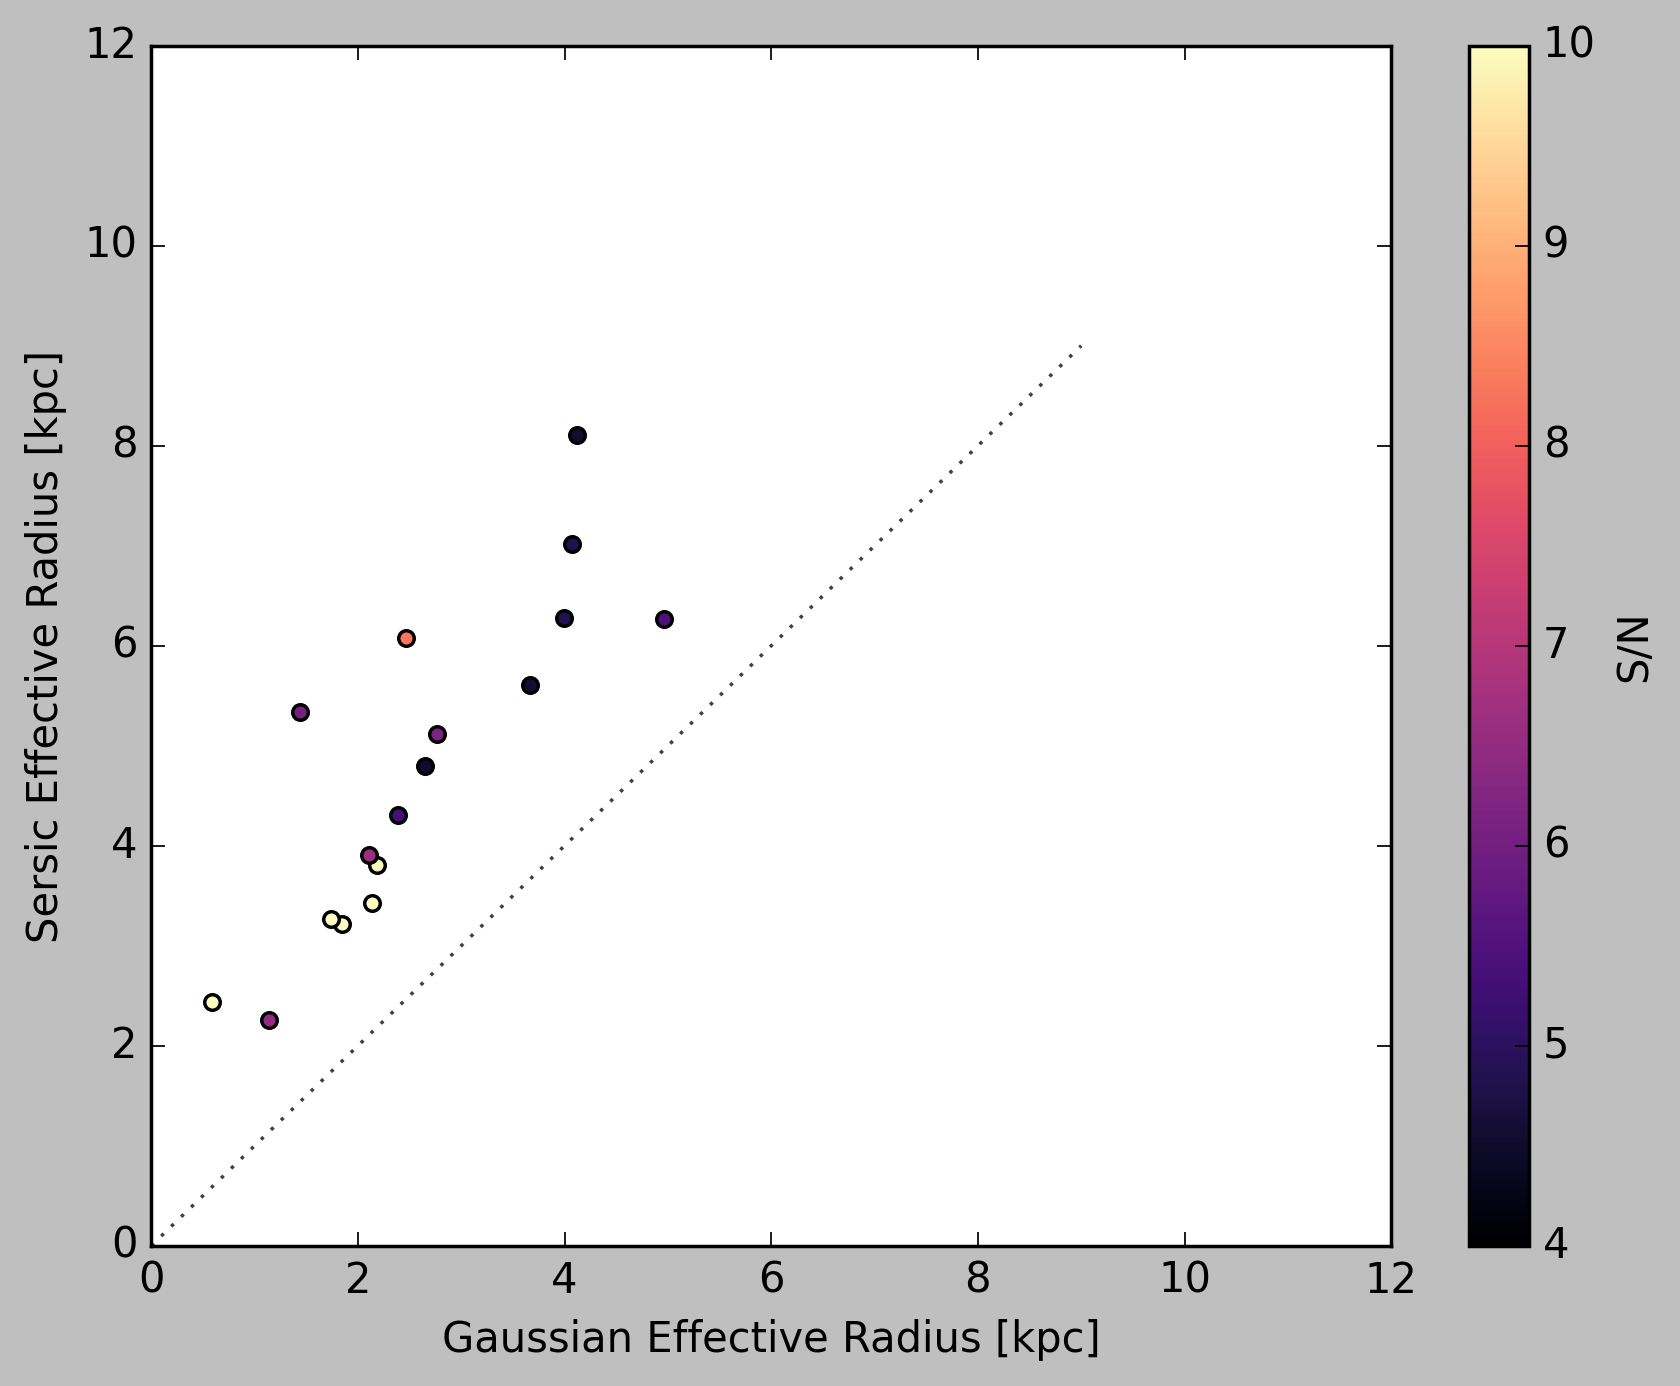

In [21]:
fig,ax = plt.subplots(1,1, dpi = 250)
vmin = 4
vmax = 10
for bcg in bcgs:
    im = ax.scatter(gaussian_re_kpc[bcg], sersic_re_kpc[bcg], c = sn_dict_natural[bcg], vmin = vmin, vmax = vmax, cmap = 'magma')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, ':', color = 'black',alpha=0.75, zorder=0)
cbar = plt.colorbar(im, ax = ax)
cbar.ax.set_ylabel('S/N')
ax.set_ylabel("Sersic Effective Radius [kpc]")
ax.set_xlabel("Gaussian Effective Radius [kpc]")

ax.set_xlim(0,12)
ax.set_ylim(0,12)

Text(0, 0.5, 'S/N')

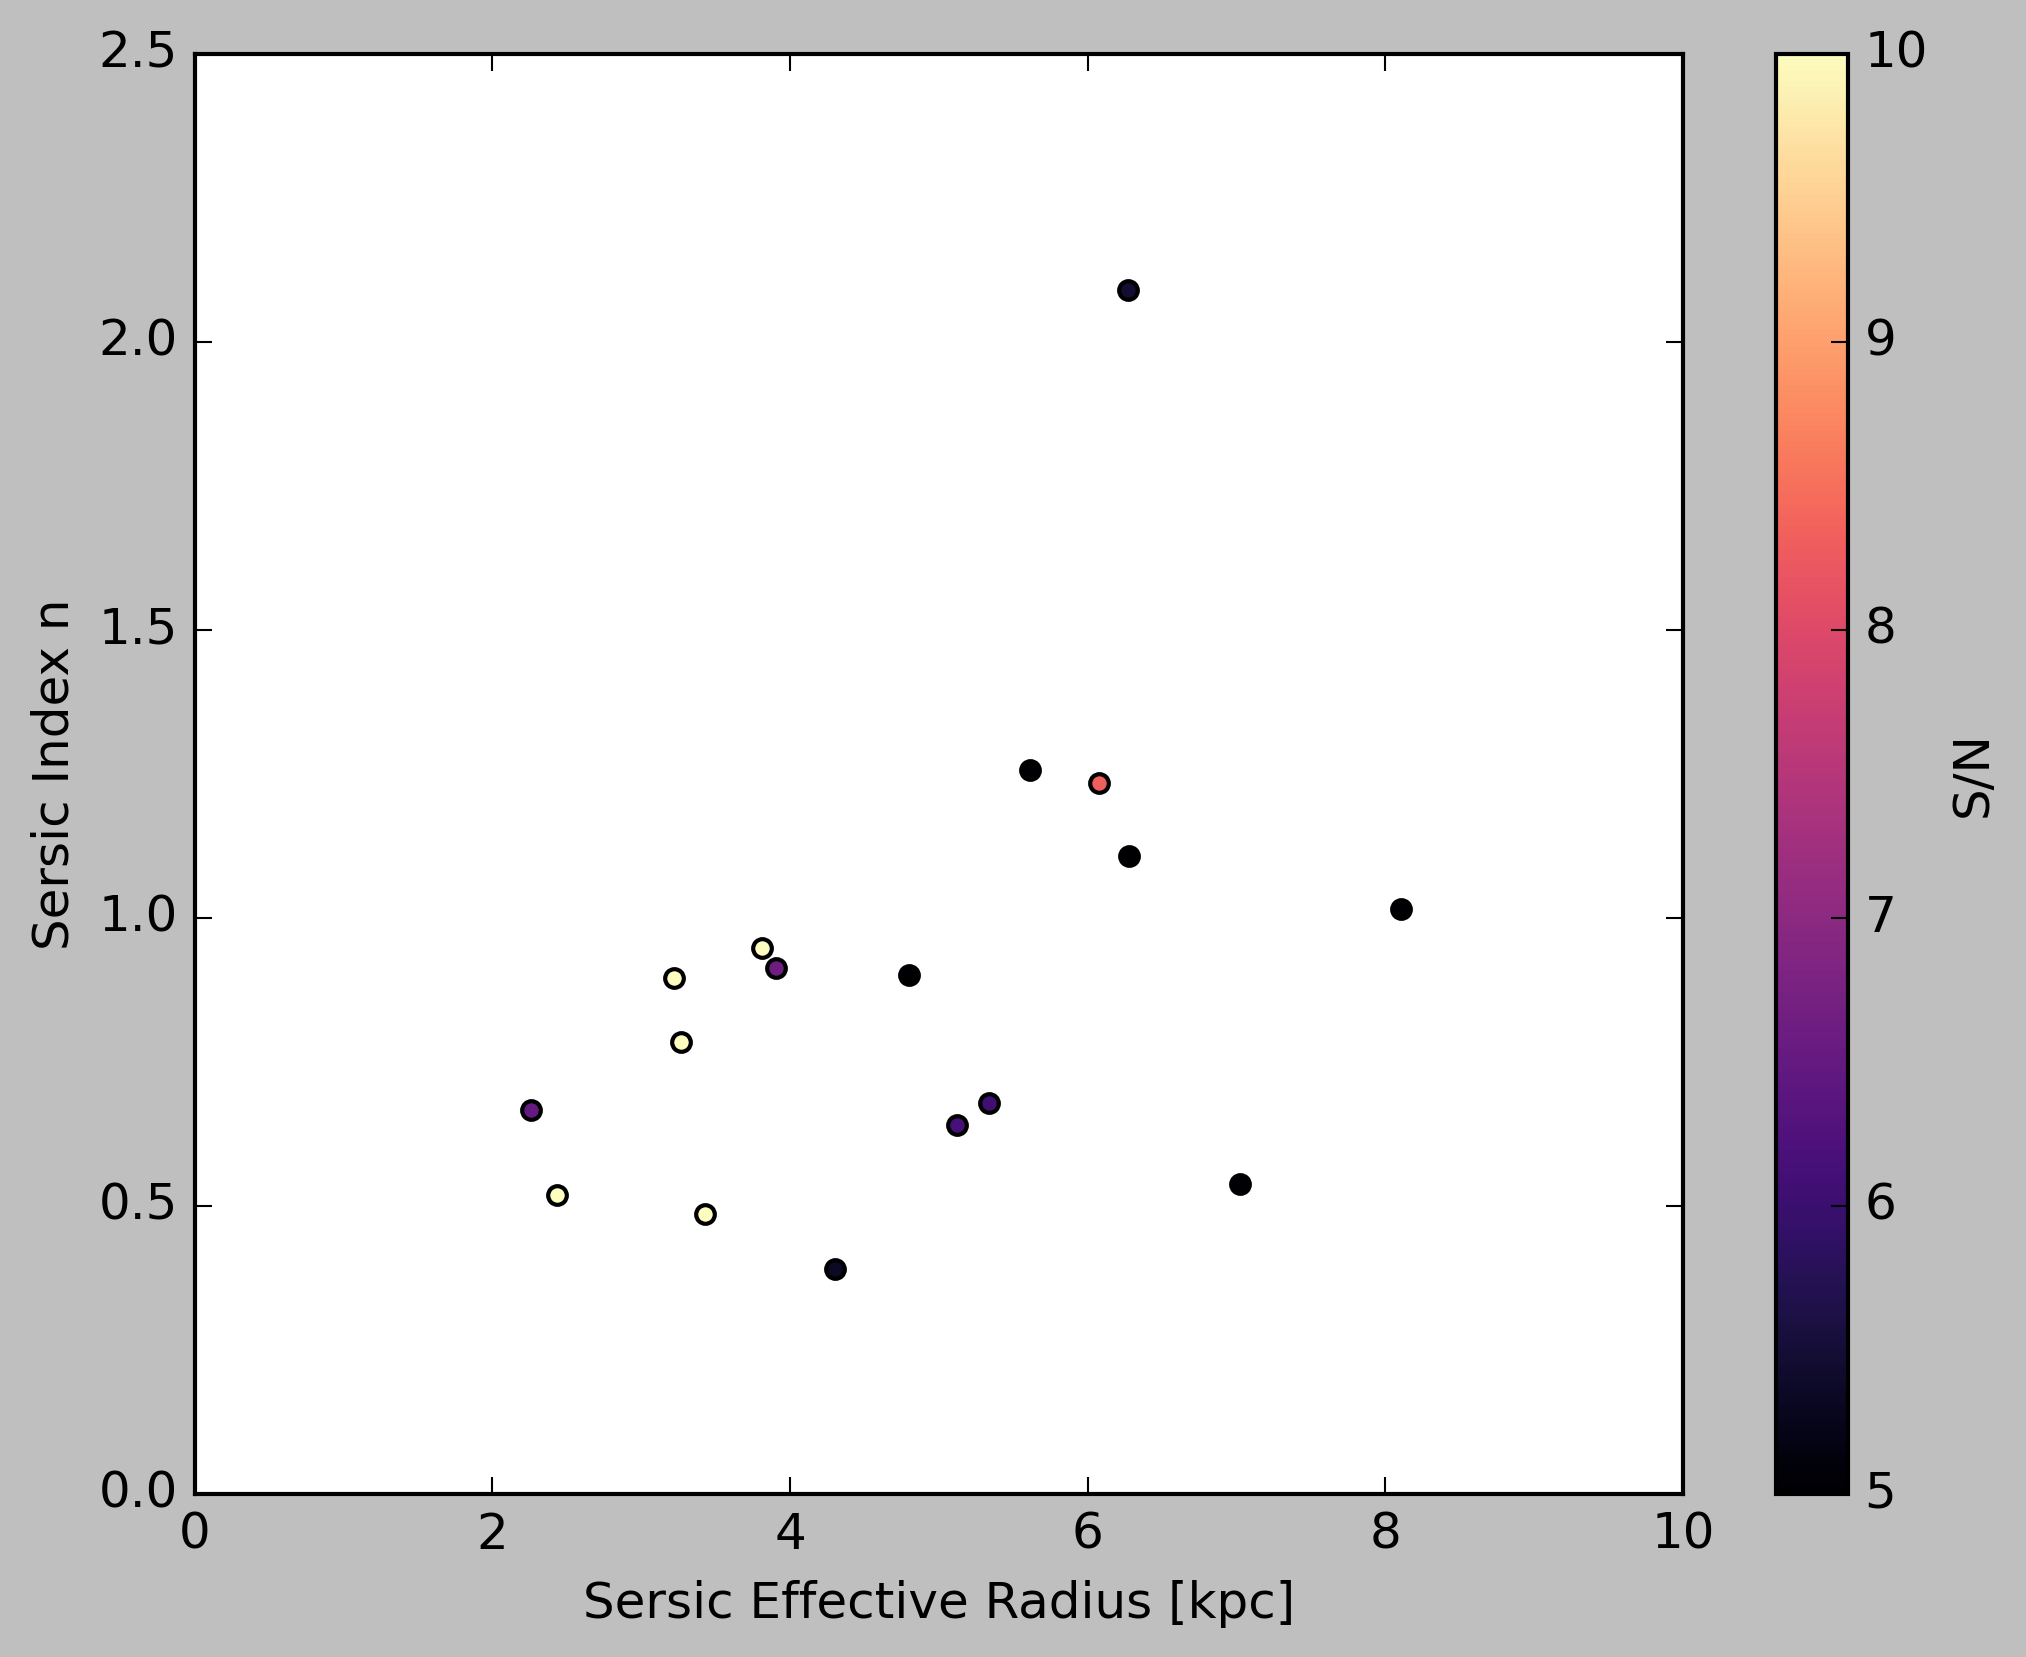

In [22]:
fig,ax = plt.subplots(1,1, dpi = 300)
vmin = 5
vmax = 10
for bcg in bcgs:
    im = ax.scatter(sersic_re_kpc[bcg], n_s[bcg],c = sn_dict_natural[bcg], vmin = vmin, vmax = vmax, cmap = 'magma')
ax.set_xlim(0,10)
ax.set_xlabel("Sersic Effective Radius [kpc]")
ax.set_ylabel("Sersic Index n")
cbar = plt.colorbar(im, ax = ax)
cbar.ax.set_ylabel('S/N')

In [104]:
%store -r sed_results

In [105]:
sed_results

bcg          SFR     SFR_err  Stellar_mass  Stellar_mass_err   
0       CDFS-18    23.824306    4.727115  1.538661e+11      1.550262e+10  \
1        ES1-18    38.219397    4.054495  1.639366e+11      1.784595e+10   
2        ES1-25    35.479174   20.181078  1.124215e+11      2.072337e+10   
3    ES1_z_0.99   152.570824  142.756763  7.522039e+10      9.566821e+09   
4   ES1_z_0.99b    36.365577   11.760642  7.119149e+10      2.409869e+10   
5    ES1_z_1.04   312.219795  148.304865  9.512975e+10      1.959103e+10   
6    ES1_z_1.38   779.855401  185.052349  1.231801e+11      1.131030e+10   
7    ES1_z_1.40   785.503591   97.363627  7.781236e+10      1.121162e+10   
8    ES1_z_1.60   682.670994   48.321684  1.453804e+11      1.047361e+10   
9    ES1_z_1.65  1306.491825   86.606746  2.793319e+11      2.580349e+10   
10   ES1_z_1.70    54.777962    4.758204  1.145421e+11      8.975100e+09   
11      XMM_113   122.218776   89.956725  3.950012e+11      8.475127e+10   
12       XMM-11   461.356198  215.942380  1.246505e+11      3.739041e+10   
13       XMM-29   621.233288   37.802112  1.403555e+11      1.232890e+10   
14       XMM-30   381.735158   50.399395  1.121162e+11      1.703403e+10   
15   XMM_z_0.81   117.641453   55.926071  1.024312e+11      2.219733e+10   
16    XMM_z_0.9    70.836925   19.586493  1.042527e+11      1.300711e+10   
17    XMM_z_1.0    65.761578   22.044591  5.580171e+10      1.894427e+10   

    reduced_chi_square  redshift  
0             9.306043  0.807580  
1             1.720605  0.806800  
2             1.620694  1.088070  
3             1.244926  1.193720  
4             1.009473  0.918860  
5             5.153100  1.040000  
6             5.326554  1.380000  
7             5.085912  1.400000  
8             9.750097  1.600000  
9             5.305960  1.650000  
10            2.810916  0.916510  
11            2.354772  1.600000  
12            1.790640  0.790000  
13            3.043430  1.450000  
14            1.367169  1.450000  
15            2.232051  0.782721  
16            0.715005  0.849570  
17            6.436920  0.535235

In [106]:
df = {"bcg": all_bcgs, "sersic_n" : sersic_n, "sersic_re" : s_re_kpc, 
     "gaussian_re" : g_re_kpc, "sn": signal_to_noise}

In [107]:
morphology_table = pd.DataFrame(df)

In [108]:
morphology_table

bcg  sersic_n  sersic_re  gaussian_re          sn
0       CDFS-18  0.517902   2.436516     0.591736  143.649252
1        ES1-18  0.900235   4.800421     2.646363    4.483446
2        ES1-25  0.678188   5.333994     1.442218    6.039673
3    ES1_z_0.99  1.106536   6.280122     3.997255    4.852950
4   ES1_z_0.99b  1.256733   5.610119     3.664476    4.551294
5    ES1_z_1.04  1.234233   6.075407     2.461854    8.309617
6    ES1_z_1.38  0.894578   3.219401     1.843903   12.158622
7    ES1_z_1.40  0.946957   3.811881     2.180142   10.655736
8    ES1_z_1.60  0.912391   3.905781     2.104622    6.630926
9    ES1_z_1.65  0.784657   3.264507     1.739828   54.101319
10   ES1_z_1.70  0.485200   3.431319     2.132865   15.567876
11       XMM-11  0.536525   7.021974     4.071436    4.831270
12      XMM-113  2.090000   6.268745     4.965232    5.457335
13       XMM-29  0.640612   5.119944     2.764262    6.134959
14       XMM-30  0.389327   4.302554     2.389749    5.347750
15    XMM_z_0.9  1.014286   8.106029     4.115928    4.552946
16    XMM_z_1.0  0.665411   2.258931     1.141625    6.498384

In [109]:
sed_results = sed_results[~(sed_results['bcg'] == 'XMM_z_0.81')]

In [110]:
sed_results=sed_results.replace('XMM_113','XMM-113')

In [111]:
sed_results

bcg          SFR     SFR_err  Stellar_mass  Stellar_mass_err   
0       CDFS-18    23.824306    4.727115  1.538661e+11      1.550262e+10  \
1        ES1-18    38.219397    4.054495  1.639366e+11      1.784595e+10   
2        ES1-25    35.479174   20.181078  1.124215e+11      2.072337e+10   
3    ES1_z_0.99   152.570824  142.756763  7.522039e+10      9.566821e+09   
4   ES1_z_0.99b    36.365577   11.760642  7.119149e+10      2.409869e+10   
5    ES1_z_1.04   312.219795  148.304865  9.512975e+10      1.959103e+10   
6    ES1_z_1.38   779.855401  185.052349  1.231801e+11      1.131030e+10   
7    ES1_z_1.40   785.503591   97.363627  7.781236e+10      1.121162e+10   
8    ES1_z_1.60   682.670994   48.321684  1.453804e+11      1.047361e+10   
9    ES1_z_1.65  1306.491825   86.606746  2.793319e+11      2.580349e+10   
10   ES1_z_1.70    54.777962    4.758204  1.145421e+11      8.975100e+09   
11      XMM-113   122.218776   89.956725  3.950012e+11      8.475127e+10   
12       XMM-11   461.356198  215.942380  1.246505e+11      3.739041e+10   
13       XMM-29   621.233288   37.802112  1.403555e+11      1.232890e+10   
14       XMM-30   381.735158   50.399395  1.121162e+11      1.703403e+10   
16    XMM_z_0.9    70.836925   19.586493  1.042527e+11      1.300711e+10   
17    XMM_z_1.0    65.761578   22.044591  5.580171e+10      1.894427e+10   

    reduced_chi_square  redshift  
0             9.306043  0.807580  
1             1.720605  0.806800  
2             1.620694  1.088070  
3             1.244926  1.193720  
4             1.009473  0.918860  
5             5.153100  1.040000  
6             5.326554  1.380000  
7             5.085912  1.400000  
8             9.750097  1.600000  
9             5.305960  1.650000  
10            2.810916  0.916510  
11            2.354772  1.600000  
12            1.790640  0.790000  
13            3.043430  1.450000  
14            1.367169  1.450000  
16            0.715005  0.849570  
17            6.436920  0.535235

In [112]:
final_results = pd.merge(sed_results, morphology_table, on = 'bcg').reset_index(drop = True)
final_results['sSFR'] = final_results['SFR']/final_results['Stellar_mass']
final_results['sSFR_err'] = (final_results['SFR']/final_results['Stellar_mass'])*np.sqrt((final_results['SFR_err']/final_results['SFR'])**2 + (final_results['Stellar_mass_err']/final_results['Stellar_mass'])**2)

In [113]:
final_results['sSFR_gyr'] = np.array(final_results['sSFR'])*1e9
final_results['sSFR_err_gyr'] = np.array(final_results['sSFR_err'])*1e9
final_results['Age'] = cosmo.age(final_results['redshift']).value
final_results['sSFR_MS'] = 26 * np.array(final_results['Age'])**(-2.2)
bcg_type = []
for ind,row in final_results.iterrows():
    if row['sSFR_gyr'] < row['sSFR_MS']/2:
        bcg_type.append(0)
    elif (row['sSFR_gyr'] > row['sSFR_MS']/2) & (row['sSFR_gyr'] < row['sSFR_MS']*2):
        bcg_type.append(1)
    elif (row['sSFR_gyr'] > row['sSFR_MS']*2):
        bcg_type.append(2)
final_results['bcg_type'] = bcg_type

In [32]:
# subMS = np.array(bcg_type) == 0
# MS = np.array(bcg_type) == 1
# SB = np.array(bcg_type) == 2
# final_results['rest_wave'] = 1.2/(1+final_results['redshift'])

In [114]:
final_results

bcg          SFR     SFR_err  Stellar_mass  Stellar_mass_err   
0       CDFS-18    23.824306    4.727115  1.538661e+11      1.550262e+10  \
1        ES1-18    38.219397    4.054495  1.639366e+11      1.784595e+10   
2        ES1-25    35.479174   20.181078  1.124215e+11      2.072337e+10   
3    ES1_z_0.99   152.570824  142.756763  7.522039e+10      9.566821e+09   
4   ES1_z_0.99b    36.365577   11.760642  7.119149e+10      2.409869e+10   
5    ES1_z_1.04   312.219795  148.304865  9.512975e+10      1.959103e+10   
6    ES1_z_1.38   779.855401  185.052349  1.231801e+11      1.131030e+10   
7    ES1_z_1.40   785.503591   97.363627  7.781236e+10      1.121162e+10   
8    ES1_z_1.60   682.670994   48.321684  1.453804e+11      1.047361e+10   
9    ES1_z_1.65  1306.491825   86.606746  2.793319e+11      2.580349e+10   
10   ES1_z_1.70    54.777962    4.758204  1.145421e+11      8.975100e+09   
11      XMM-113   122.218776   89.956725  3.950012e+11      8.475127e+10   
12       XMM-11   461.356198  215.942380  1.246505e+11      3.739041e+10   
13       XMM-29   621.233288   37.802112  1.403555e+11      1.232890e+10   
14       XMM-30   381.735158   50.399395  1.121162e+11      1.703403e+10   
15    XMM_z_0.9    70.836925   19.586493  1.042527e+11      1.300711e+10   
16    XMM_z_1.0    65.761578   22.044591  5.580171e+10      1.894427e+10   

    reduced_chi_square  redshift  sersic_n  sersic_re  gaussian_re   
0             9.306043  0.807580  0.517902   2.436516     0.591736  \
1             1.720605  0.806800  0.900235   4.800421     2.646363   
2             1.620694  1.088070  0.678188   5.333994     1.442218   
3             1.244926  1.193720  1.106536   6.280122     3.997255   
4             1.009473  0.918860  1.256733   5.610119     3.664476   
5             5.153100  1.040000  1.234233   6.075407     2.461854   
6             5.326554  1.380000  0.894578   3.219401     1.843903   
7             5.085912  1.400000  0.946957   3.811881     2.180142   
8             9.750097  1.600000  0.912391   3.905781     2.104622   
9             5.305960  1.650000  0.784657   3.264507     1.739828   
10            2.810916  0.916510  0.485200   3.431319     2.132865   
11            2.354772  1.600000  2.090000   6.268745     4.965232   
12            1.790640  0.790000  0.536525   7.021974     4.071436   
13            3.043430  1.450000  0.640612   5.119944     2.764262   
14            1.367169  1.450000  0.389327   4.302554     2.389749   
15            0.715005  0.849570  1.014286   8.106029     4.115928   
16            6.436920  0.535235  0.665411   2.258931     1.141625   

            sn          sSFR      sSFR_err   sSFR_gyr  sSFR_err_gyr       Age   
0   143.649252  1.548379e-10  3.445627e-11   0.154838      0.034456  6.597183  \
1     4.483446  2.331352e-10  3.543672e-11   0.233135      0.035437  6.601018   
2     6.039673  3.155908e-10  1.887038e-10   0.315591      0.188704  5.413663   
3     4.852950  2.028317e-09  1.915299e-09   2.028317      1.915299  5.052398   
4     4.551294  5.108135e-10  2.391424e-10   0.510814      0.239142  6.083441   
5     8.309617  3.282042e-09  1.699191e-09   3.282042      1.699191  5.591708   
6    12.158622  6.331018e-09  1.610838e-09   6.331018      1.610838  4.502037   
7    10.655736  1.009484e-08  1.918666e-09  10.094843      1.918666  4.448673   
8     6.630926  4.695757e-09  4.742585e-10   4.695757      0.474258  3.966461   
9    54.101319  4.677203e-09  5.317956e-10   4.677203      0.531796  3.858989   
10   15.567876  4.782344e-10  5.594521e-11   0.478234      0.055945  6.093640   
11    5.457335  3.094137e-10  2.372169e-10   0.309414      0.237217  3.966461   
12    4.831270  3.701197e-09  2.057604e-09   3.701197      2.057604  6.684458   
13    6.134959  4.426140e-09  4.729696e-10   4.426140      0.472970  4.319611   
14    5.347750  3.404818e-09  6.853288e-10   3.404818      0.685329  4.319611   
15    4.552946  6.794732e-10  2.061160e-10   0.679473      0.206116  6.395702   
16   

In [115]:
spec_z = ['CDFS-18', 'CDFS-19', "ES1-12","ES1-18","ES1-25","ES1-26", "XMM-19", "XMM_z_0.9", "XMM_z_1.0", "XMM_z_0.81",
         "ES1_z_0.88", "ES1_z_0.99", "ES1_z_0.99b", "ES1_z_1.70"]

In [116]:
spec_z_df = final_results[final_results['bcg'].isin(spec_z)]

In [117]:
phot_z_df = final_results[~(final_results['bcg'].isin(spec_z))]

In [118]:
final_results.to_csv("/Users/arames52/bcg_dust_continuum/notebook/data/Derived_Data/results_table.csv")

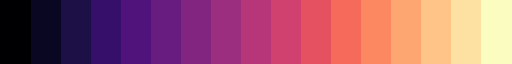

In [57]:
colors

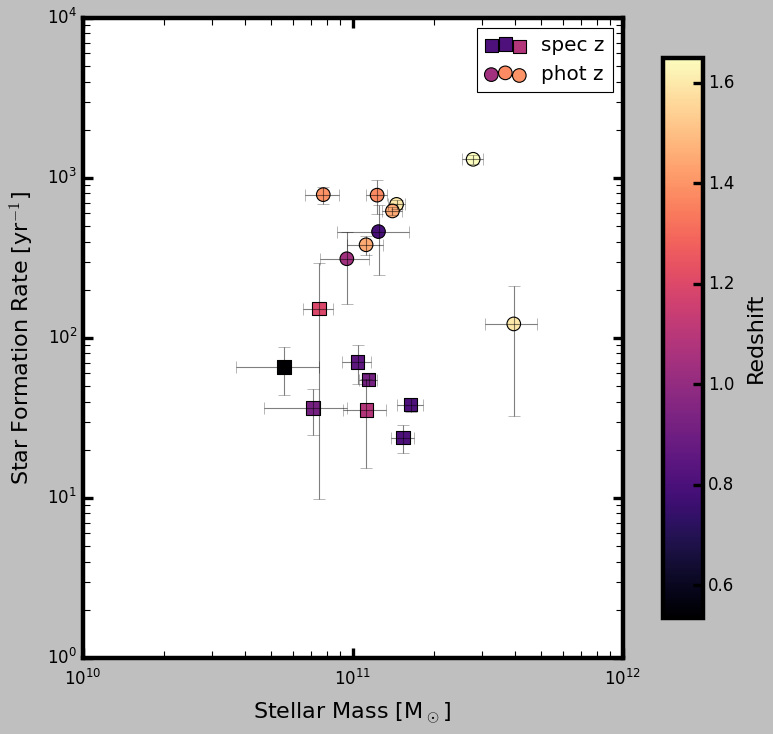

In [124]:
from matplotlib import cm
plt.style.use("/Users/arames52/bcg_dust_continuum/notebook/stylesheet.txt")
redshift_list = list(final_results['redshift'])
vmin,vmax = min(redshift_list), max(redshift_list)
fig,ax = plt.subplots(figsize = (10,10))
ax.set_facecolor('white')
im = ax.scatter(spec_z_df['Stellar_mass'], spec_z_df['SFR'], marker = 's', cmap = 'magma', c = spec_z_df['redshift'], s = 150, vmin = vmin, vmax = vmax, label = "spec z")
ax.errorbar(spec_z_df['Stellar_mass'], spec_z_df['SFR'], xerr = spec_z_df['Stellar_mass_err'], yerr = spec_z_df['SFR_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)

ax.scatter(phot_z_df['Stellar_mass'], phot_z_df['SFR'], marker = 'o', cmap = 'magma', c = phot_z_df['redshift'], s = 150, vmin = vmin, vmax = vmax, label = "phot z")
ax.errorbar(phot_z_df['Stellar_mass'], phot_z_df['SFR'], xerr = phot_z_df['Stellar_mass_err'], yerr = phot_z_df['SFR_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)

ax.set_xlabel("Stellar Mass [M$_\odot$]")
ax.set_ylabel("Star Formation Rate [yr$^{-1}$]")
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
# ax.grid()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel("Redshift")

fig.savefig("/Users/arames52/bcg_dust_continuum/notebook/data/sfr_mstar.jpeg", dpi = 300)

# Hodge SMGs

In [120]:
from uncertainties import ufloat
from uncertainties.umath import *
smg_sm = pd.read_csv("/Users/arames52/Research/Data/aless_smgs.txt", names = ["id", "MH", "z"], delim_whitespace=True)
def mh_to_mstar(mh):
    log_mstar = (ufloat(-0.393, 0.002) * mh) + ufloat(1.22, 0.04)
    return log_mstar
smg_morph = pd.read_csv("/Users/arames52/Research/Data/hodge_smg.txt", names=["id", "Re", "n"], 
                       delim_whitespace=True)
mh_arr = list(smg_sm['MH'])
hodge_smg = smg_sm.merge(smg_morph)
hodge_smg['mstar'] = mh_to_mstar(hodge_smg['MH'])
stellar_mass = []
stellar_mass_err = []
for ind, row in hodge_smg.iterrows():
    stellar_mass.append(row['mstar'].n)
    stellar_mass_err.append(row['mstar'].std_dev)
hodge_smg['stellar_mass'] = stellar_mass
hodge_smg['stellar_mass_err'] = stellar_mass_err
hodge_smg['Re_kpc'] = (cosmo.kpc_proper_per_arcmin(np.array(hodge_smg['z']))*(np.array(hodge_smg['Re']))/60).value
hodge_smg['rest_wave'] = 0.87/(1 + hodge_smg['z'])
hodge_smg['median_SFR'] = 500

In [121]:
etg = pd.read_csv("/Users/arames52/Research/Data/mnras0382-0109-SD1.csv")
# etg = etg[etg['z'].between(0.7,1.7)]
etg['re'] = etg['ae']*np.sqrt(1-etg['epsilon'])
etg['re_kpc'] = (cosmo.kpc_proper_per_arcmin(np.array(etg['z']))*(np.array(etg['re']))/60).value
etg['stellar_mass_log'] = np.log10(np.array(etg['stellar_mass'])*10**10)
etg['rest_wave'] = 0.00081/(1+etg['z'])
hst_bcgs = pd.read_csv("/Users/arames52/Downloads/table2.dat.txt", delim_whitespace=True, names = ["name", "class", "model", "mag", 
                                                                                                  "mean_sb", "re", "n", "b/a", "pa", 
                                                                                                   "align"])
hst_bcgs_tab1 = pd.read_csv("/Users/arames52/Downloads/table1.dat.txt", delim_whitespace=True, names = ["name", "ra",
                                                    "dec", "z", "class", "inst", "filter", "scale", "color"])
hst_bcgs_mass = pd.read_csv("/Users/arames52/Research/Data/hst_bcgs_mass.dat.txt", delim_whitespace = True, names = ["name", "ra", "dec", "r_pos",
                                                                                                                    "M200", "E_M200", "e_M200", "Method", "r-M200",
                                                                                                                    "PAcl", "e_PAcl","r"])
hst_bcgs_mass = hst_bcgs_mass[["name", "M200", "e_M200"]]
hst_bcgs = hst_bcgs.merge(hst_bcgs_tab1, on = "name")
hst_bcgs = hst_bcgs.merge(hst_bcgs_mass, on = "name")
hst_bcgs = hst_bcgs[hst_bcgs['model'] == "Sersic"]
# hst_bcgs = hst_bcgs[hst_bcgs['z'].between(0.7,1.7, inclusive = "both")]
# np.unique(hst_bcgs['filter'])
# hst_filters = {"F105W" : 1055.2, "F125W" : 1248.6, "F140W" : 1392.3, "F160W": 1536.9, "F814W": 8115.3, "F850LP":9145.2}
# hst_bcgs['rest_wave'] = 0
# for ind, row in hst_bcgs.iterrows():
#     hst_bcgs.loc[ind, 'rest_wave'] = hst_filters[row['filter']]*1e-6 / (1+ row['z'])

In [122]:
bcg_info = final_results.copy()
vmin, vmax = 100,1000

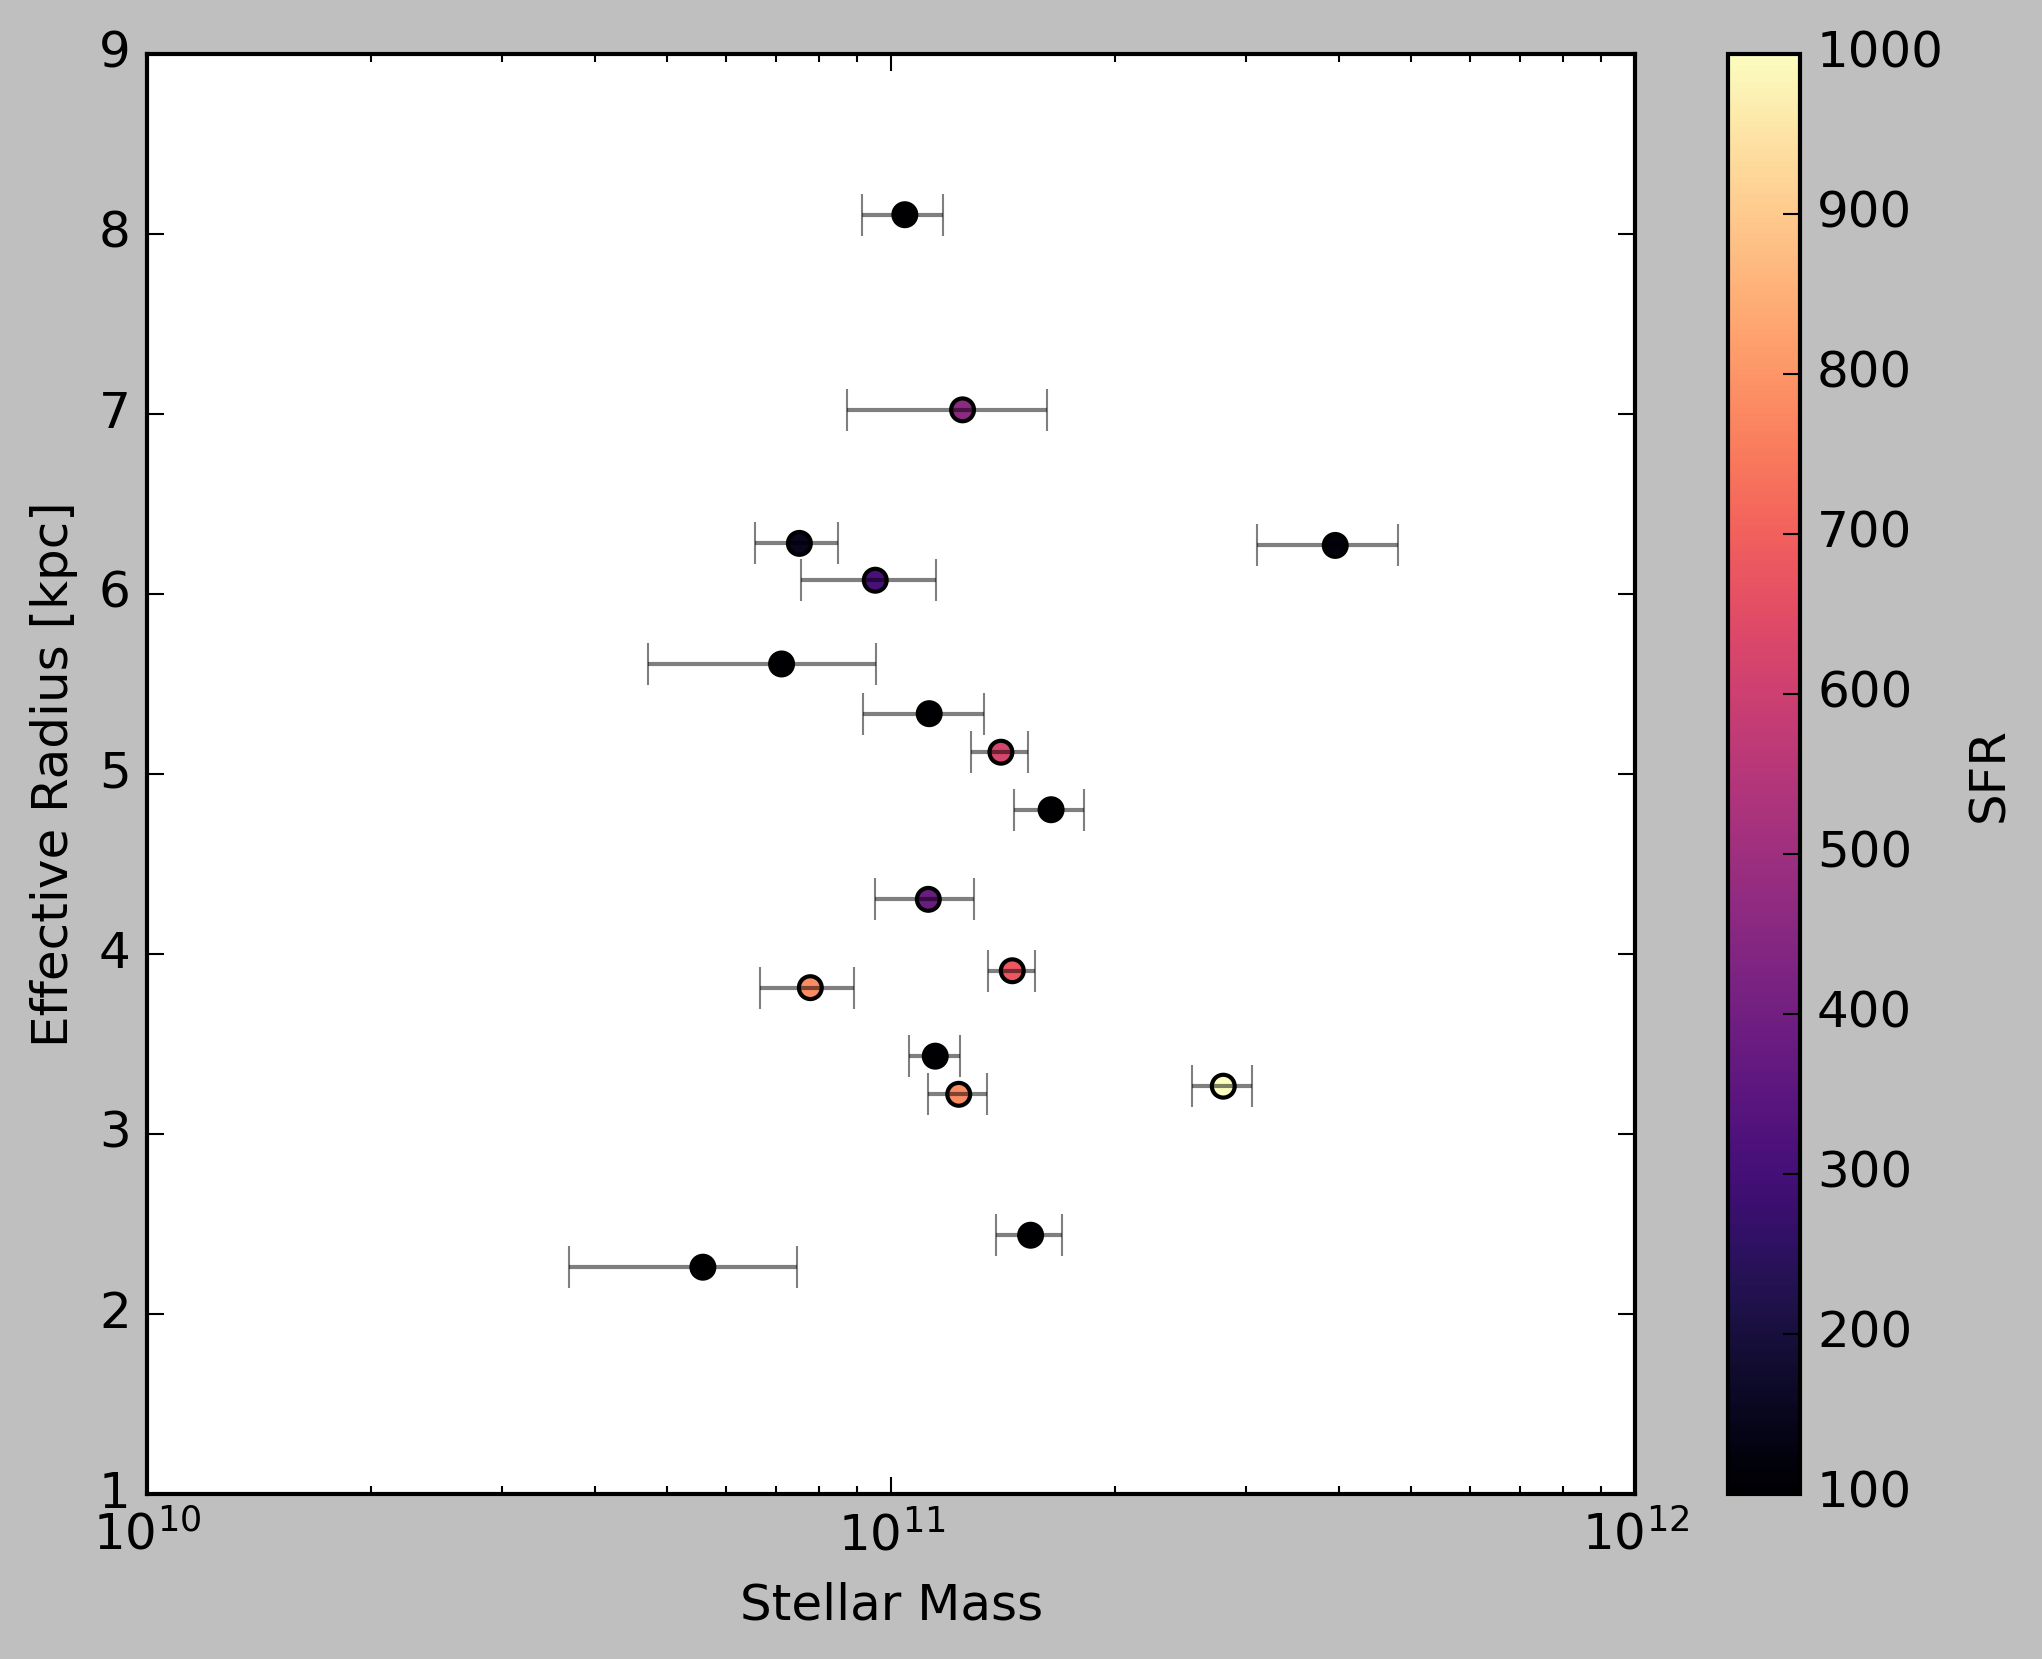

In [123]:
fig,ax = plt.subplots(1,1,dpi = 300)
im = ax.scatter(bcg_info['Stellar_mass'], bcg_info['sersic_re'], marker = 'o', s = 30, c = bcg_info['SFR'],vmin = vmin, vmax = vmax, cmap = "magma", label = "ALMA BCGs")
ax.errorbar(bcg_info['Stellar_mass'], bcg_info['sersic_re'], xerr = bcg_info['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
cbar = plt.colorbar(im, ax = ax)
cbar.ax.set_ylabel("SFR")
ax.set_ylabel("Effective Radius [kpc]")
ax.set_xlabel("Stellar Mass")
ax.set_xscale('log')
plt.savefig("re_mstar_alma.jpg", dpi = 300)

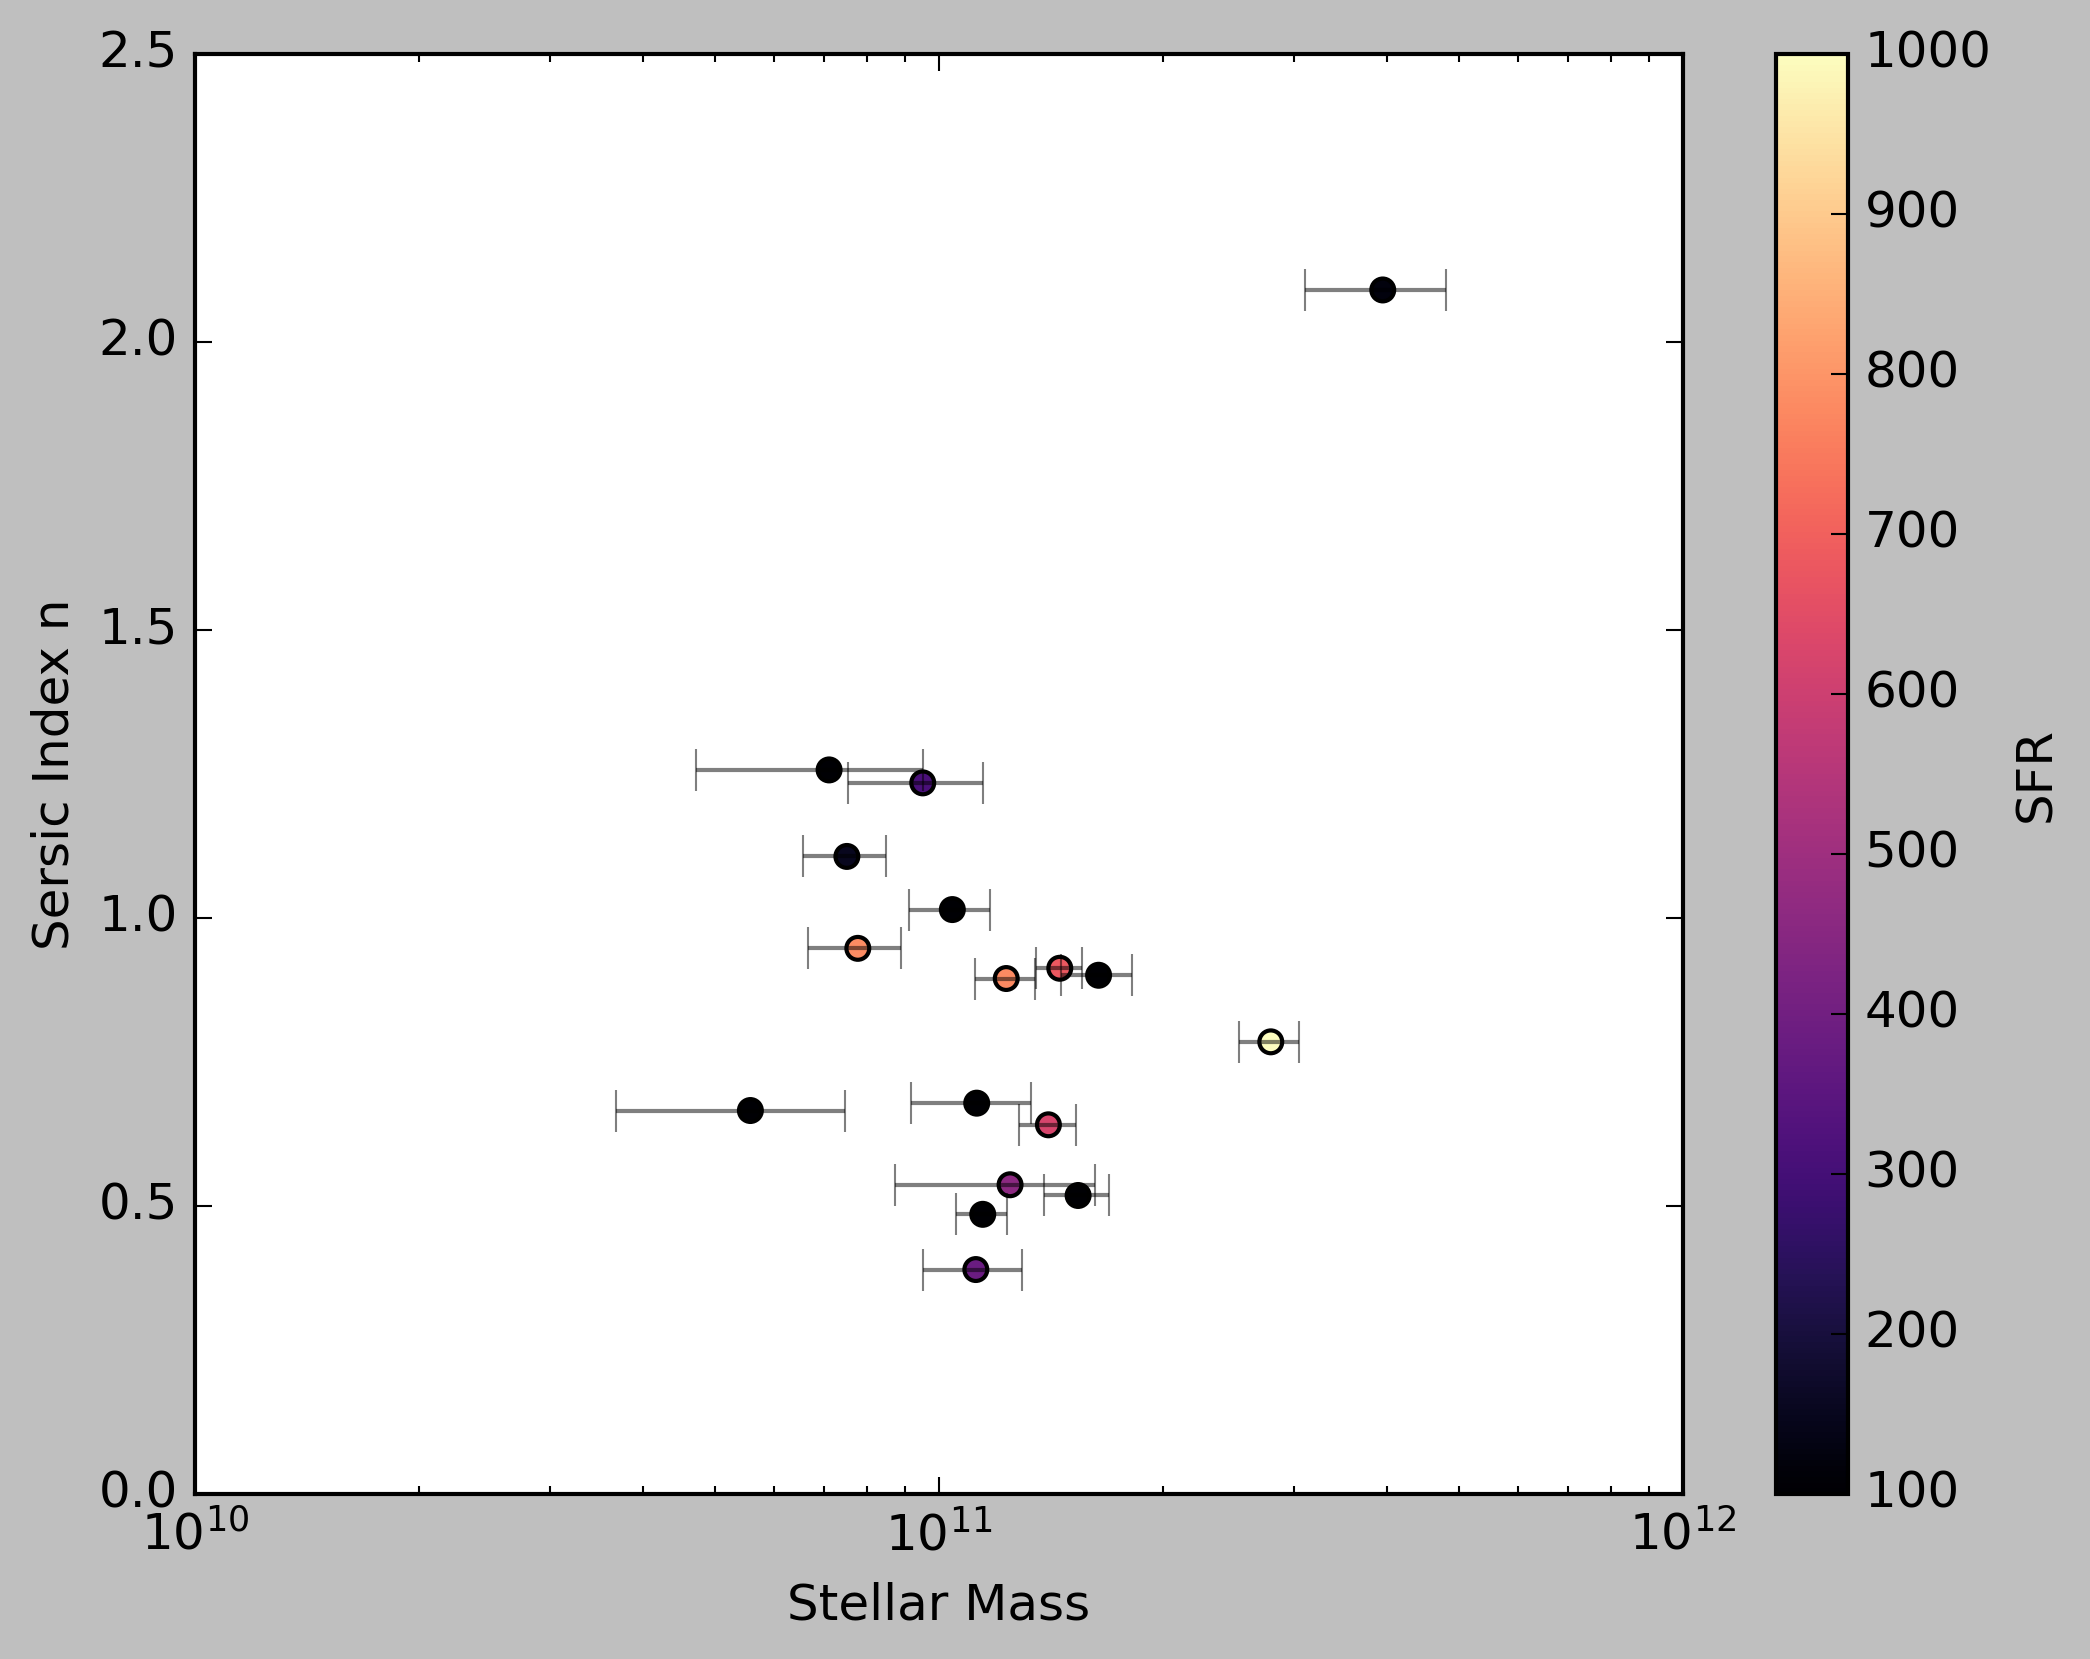

In [36]:
fig,ax = plt.subplots(1,1,dpi = 300)
im = ax.scatter(bcg_info['Stellar_mass'], bcg_info['sersic_n'], marker = 'o', s = 30, c = bcg_info['SFR'],vmin = vmin, vmax = vmax, cmap = "magma", label = "ALMA BCGs")
ax.errorbar(bcg_info['Stellar_mass'], bcg_info['sersic_n'], xerr = bcg_info['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
cbar = plt.colorbar(im, ax = ax)
cbar.ax.set_ylabel("SFR")
ax.set_ylabel("Sersic Index n")
ax.set_xlabel("Stellar Mass")
ax.set_xscale('log')
plt.savefig("n_mstar.jpg", dpi = 300)

In [72]:
final_results

bcg          SFR     SFR_err  Stellar_mass  Stellar_mass_err   
0       CDFS-18    23.824306    4.727115  1.538661e+11      1.550262e+10  \
1        ES1-18    38.219397    4.054495  1.639366e+11      1.784595e+10   
2        ES1-25    35.479174   20.181078  1.124215e+11      2.072337e+10   
3    ES1_z_0.99   152.570824  142.756763  7.522039e+10      9.566821e+09   
4   ES1_z_0.99b    36.365577   11.760642  7.119149e+10      2.409869e+10   
5    ES1_z_1.04   312.219795  148.304865  9.512975e+10      1.959103e+10   
6    ES1_z_1.38   779.855401  185.052349  1.231801e+11      1.131030e+10   
7    ES1_z_1.40   785.503591   97.363627  7.781236e+10      1.121162e+10   
8    ES1_z_1.60   682.670994   48.321684  1.453804e+11      1.047361e+10   
9    ES1_z_1.65  1306.491825   86.606746  2.793319e+11      2.580349e+10   
10   ES1_z_1.70    54.777962    4.758204  1.145421e+11      8.975100e+09   
11      XMM-113   122.218776   89.956725  3.950012e+11      8.475127e+10   
12       XMM-11   461.356198  215.942380  1.246505e+11      3.739041e+10   
13       XMM-29   621.233288   37.802112  1.403555e+11      1.232890e+10   
14       XMM-30   381.735158   50.399395  1.121162e+11      1.703403e+10   
15    XMM_z_0.9    70.836925   19.586493  1.042527e+11      1.300711e+10   
16    XMM_z_1.0    65.761578   22.044591  5.580171e+10      1.894427e+10   

    reduced_chi_square  redshift  sersic_n  sersic_re  gaussian_re   
0             9.306043  0.807580  0.517902   2.436516     0.591736  \
1             1.720605  0.806800  0.900235   4.800421     2.646363   
2             1.620694  1.088070  0.678188   5.333994     1.442218   
3             1.244926  1.193720  1.106536   6.280122     3.997255   
4             1.009473  0.918860  1.256733   5.610119     3.664476   
5             5.153100  1.040000  1.234233   6.075407     2.461854   
6             5.326554  1.380000  0.894578   3.219401     1.843903   
7             5.085912  1.400000  0.946957   3.811881     2.180142   
8             9.750097  1.600000  0.912391   3.905781     2.104622   
9             5.305960  1.650000  0.784657   3.264507     1.739828   
10            2.810916  0.916510  0.485200   3.431319     2.132865   
11            2.354772  1.600000  2.090000   6.268745     4.965232   
12            1.790640  0.790000  0.536525   7.021974     4.071436   
13            3.043430  1.450000  0.640612   5.119944     2.764262   
14            1.367169  1.450000  0.389327   4.302554     2.389749   
15            0.715005  0.849570  1.014286   8.106029     4.115928   
16            6.436920  0.535235  0.665411   2.258931     1.141625   

            sn          sSFR      sSFR_err   sSFR_gyr  sSFR_err_gyr       Age   
0   143.649252  1.548379e-10  3.445627e-11   0.154838      0.034456  6.597183  \
1     4.483446  2.331352e-10  3.543672e-11   0.233135      0.035437  6.601018   
2     6.039673  3.155908e-10  1.887038e-10   0.315591      0.188704  5.413663   
3     4.852950  2.028317e-09  1.915299e-09   2.028317      1.915299  5.052398   
4     4.551294  5.108135e-10  2.391424e-10   0.510814      0.239142  6.083441   
5     8.309617  3.282042e-09  1.699191e-09   3.282042      1.699191  5.591708   
6    12.158622  6.331018e-09  1.610838e-09   6.331018      1.610838  4.502037   
7    10.655736  1.009484e-08  1.918666e-09  10.094843      1.918666  4.448673   
8     6.630926  4.695757e-09  4.742585e-10   4.695757      0.474258  3.966461   
9    54.101319  4.677203e-09  5.317956e-10   4.677203      0.531796  3.858989   
10   15.567876  4.782344e-10  5.594521e-11   0.478234      0.055945  6.093640   
11    5.457335  3.094137e-10  2.372169e-10   0.309414      0.237217  3.966461   
12    4.831270  3.701197e-09  2.057604e-09   3.701197      2.057604  6.684458   
13    6.134959  4.426140e-09  4.729696e-10   4.426140      0.472970  4.319611   
14    5.347750  3.404818e-09  6.853288e-10   3.404818      0.685329  4.319611   
15    4.552946  6.794732e-10  2.061160e-10   0.679473      0.206116  6.395702   
16   

In [125]:
hodge_smg

id     MH     z    Re    n         mstar  stellar_mass   
0     ALESS1.1 -24.90  4.34  0.16  1.7  11.01+/-0.06      11.00570  \
1     ALESS1.2 -24.79  4.65  0.23  2.4  10.96+/-0.06      10.96247   
2     ALESS3.1 -25.51  3.90  0.24  1.4  11.25+/-0.06      11.24543   
3     ALESS5.1 -25.71  2.86  0.26  0.7  11.32+/-0.07      11.32403   
4     ALESS9.1 -25.98  4.50  0.23  0.7  11.43+/-0.07      11.43014   
5    ALESS10.1 -23.57  2.02  0.39  1.0  10.48+/-0.06      10.48301   
6    ALESS15.1 -23.94  1.93  0.31  0.9  10.63+/-0.06      10.62842   
7    ALESS17.1 -24.46  1.51  0.20  0.5  10.83+/-0.06      10.83278   
8    ALESS29.1 -24.78  2.66  0.16  0.7  10.96+/-0.06      10.95854   
9    ALESS39.1 -24.74  2.44  0.27  1.2  10.94+/-0.06      10.94282   
10   ALESS45.1 -24.77  2.34  0.26  0.5  10.95+/-0.06      10.95461   
11   ALESS67.1 -25.35  2.14  0.25  1.2  11.18+/-0.06      11.18255   
12   ALESS73.1 -25.61  5.18  0.20  1.0  11.28+/-0.06      11.28473   
13  ALESS112.1 -24.67  1.95  0.22  0.5  10.92+/-0.06      10.91531   

    stellar_mass_err    Re_kpc  rest_wave  median_SFR  
0           0.063875  1.073886   0.162921         500  
1           0.063704  1.495881   0.153982         500  
2           0.064831  1.685534   0.177551         500  
3           0.065146  2.030037   0.225389         500  
4           0.065573  1.518746   0.158182         500  
5           0.061824  3.260484   0.288079         500  
6           0.062390  2.603870   0.296928         500  
7           0.063192  1.692670   0.346614         500  
8           0.063688  1.273031   0.237705         500  
9           0.063626  2.190215   0.252907         500  
10          0.063673  2.126334   0.260479         500  
11          0.064579  2.074645   0.277070         500  
12          0.064988  1.234175   0.140777         500  
13          0.063517  1.846110   0.294915         500

In [126]:
etg

Galaxy ID     Ks    ae     n  epsilon  stellar_mass     z        R.A.   
0     11051619  16.75  0.90  3.60     0.38         11.94  0.46  214.258865  \
1     12004106  17.13  0.80  6.72     0.11         26.72  0.74  214.379730   
2     12004308  16.95  0.89  1.23     0.58         18.03  0.64  214.266815   
3     12004443  17.06  0.48  5.04     0.21         26.96  0.77  214.318298   
4     12004485  17.59  0.49  2.27     0.60         13.20  0.68  214.317200   
..         ...    ...   ...   ...      ...           ...   ...         ...   
791   14002856  18.46  0.81  0.24     0.33         40.05  1.50  215.322479   
792   14007697  18.85  0.44  3.98     0.28         12.21  1.89  215.357574   
793   14007876  18.87  0.15  4.91     0.20         20.11  1.41  215.324188   
794   14007997  17.98  0.39  4.59     0.28         18.66  0.87  215.307083   
795   14008053  18.28  0.26  7.48     0.41         14.12  0.94  215.325653   

          Dec.  Spec.        re    re_kpc  stellar_mass_log  rest_wave  
0    52.399944      0  0.708661  4.132435         11.077004   0.000555  
1    52.443295      1  0.754718  5.510204         11.426836   0.000466  
2    52.412926      0  0.576786  3.969638         11.255996   0.000494  
3    52.429092      1  0.426633  3.160582         11.430720   0.000458  
4    52.434250      1  0.309903  2.188492         11.120574   0.000482  
..         ...    ...       ...       ...               ...        ...  
791  53.248005      0  0.663014  5.610105         11.602603   0.000324  
792  53.272987      0  0.373352  3.141705         11.086716   0.000280  
793  53.291809      0  0.134164  1.131744         11.303412   0.000336  
794  53.292236      1  0.330926  2.552456         11.270912   0.000433  
795  53.290066      0  0.199710  1.574621         11.149835   0.000418  

[796 rows x 14 columns]

In [127]:
hst_bcgs

name  class_x   model     mag  mean_sb      re     n   
0           XDCPJ0044-2033        1  Sersic -25.073   23.119  12.944  3.39  \
1             CLJ0152-1357        1  Sersic -24.859   23.471  21.802  3.59   
2   CLJ015244.18-135715.84        2  Sersic -24.378   22.698  12.740  4.24   
3   CLJ015244.18-135715.84        2  Sersic -24.378   22.698  12.740  4.24   
4   CLJ015244.18-135715.84        1  Sersic -24.478   22.343  11.331  7.96   
..                     ...      ...     ...     ...      ...     ...   ...   
63            RCS2345-3632        1  Sersic -24.659   22.317  11.956  8.04   
64        SPT-CLJ2359-5009        2  Sersic -24.486   22.655  11.804  3.19   
65        SPT-CLJ2359-5009        2  Sersic -24.486   22.655  11.804  3.19   
66        SPT-CLJ2359-5009        1  Sersic -24.766   23.726  21.984  4.15   
67        SPT-CLJ2359-5009        1  Sersic -24.766   23.726  21.984  4.15   

     b/a   pa  align        ra      dec     z  class_y     inst filter  scale   
0   0.36   11     63   11.0236 -20.5651  1.59        1  WFC3_IR  F160W  8.420  \
1   0.70   49     99   28.1649 -13.9739  0.87        1  WFC3_IR  F105W  7.681   
2   0.75   42     99   28.1820 -13.9552  0.84        2  WFC3_IR  F105W  7.598   
3   0.75   42     99   28.1824 -13.9555  0.84        1  WFC3_IR  F105W  7.598   
4   1.00   10     99   28.1820 -13.9552  0.84        2  WFC3_IR  F105W  7.598   
..   ...  ...    ...       ...      ...   ...      ...      ...    ...    ...   
63  0.75   28     56  356.3729 -36.5461  1.04        1  WFC3_IR  F160W  8.041   
64  0.75  123      6  359.9286 -50.1672  0.77        2  ACS_WFC  F814W  7.380   
65  0.75  123      6  359.9326 -50.1723  0.77        1  ACS_WFC  F814W  7.380   
66  0.69  123      6  359.9286 -50.1672  0.77        2  ACS_WFC  F814W  7.380   
67  0.69  123      6  359.9326 -50.1723  0.77        1  ACS_WFC  F814W  7.380   

           color   M200  e_M200  
0    F105W-F140W   3.98    1.58  
1   F775W-F850LP  14.00    4.60  
2   F625W-F850LP  14.00    4.60  
3   F625W-F850LP  14.00    4.60  
4   F625W-F850LP  14.00    4.60  
..           ...    ...     ...  
63   F105W-F160W   2.40    0.70  
64           NaN   6.92    1.61  
65           NaN   6.92    1.61  
66           NaN   6.92    1.61  
67           NaN   6.92    1.61  

[66 rows x 20 columns]

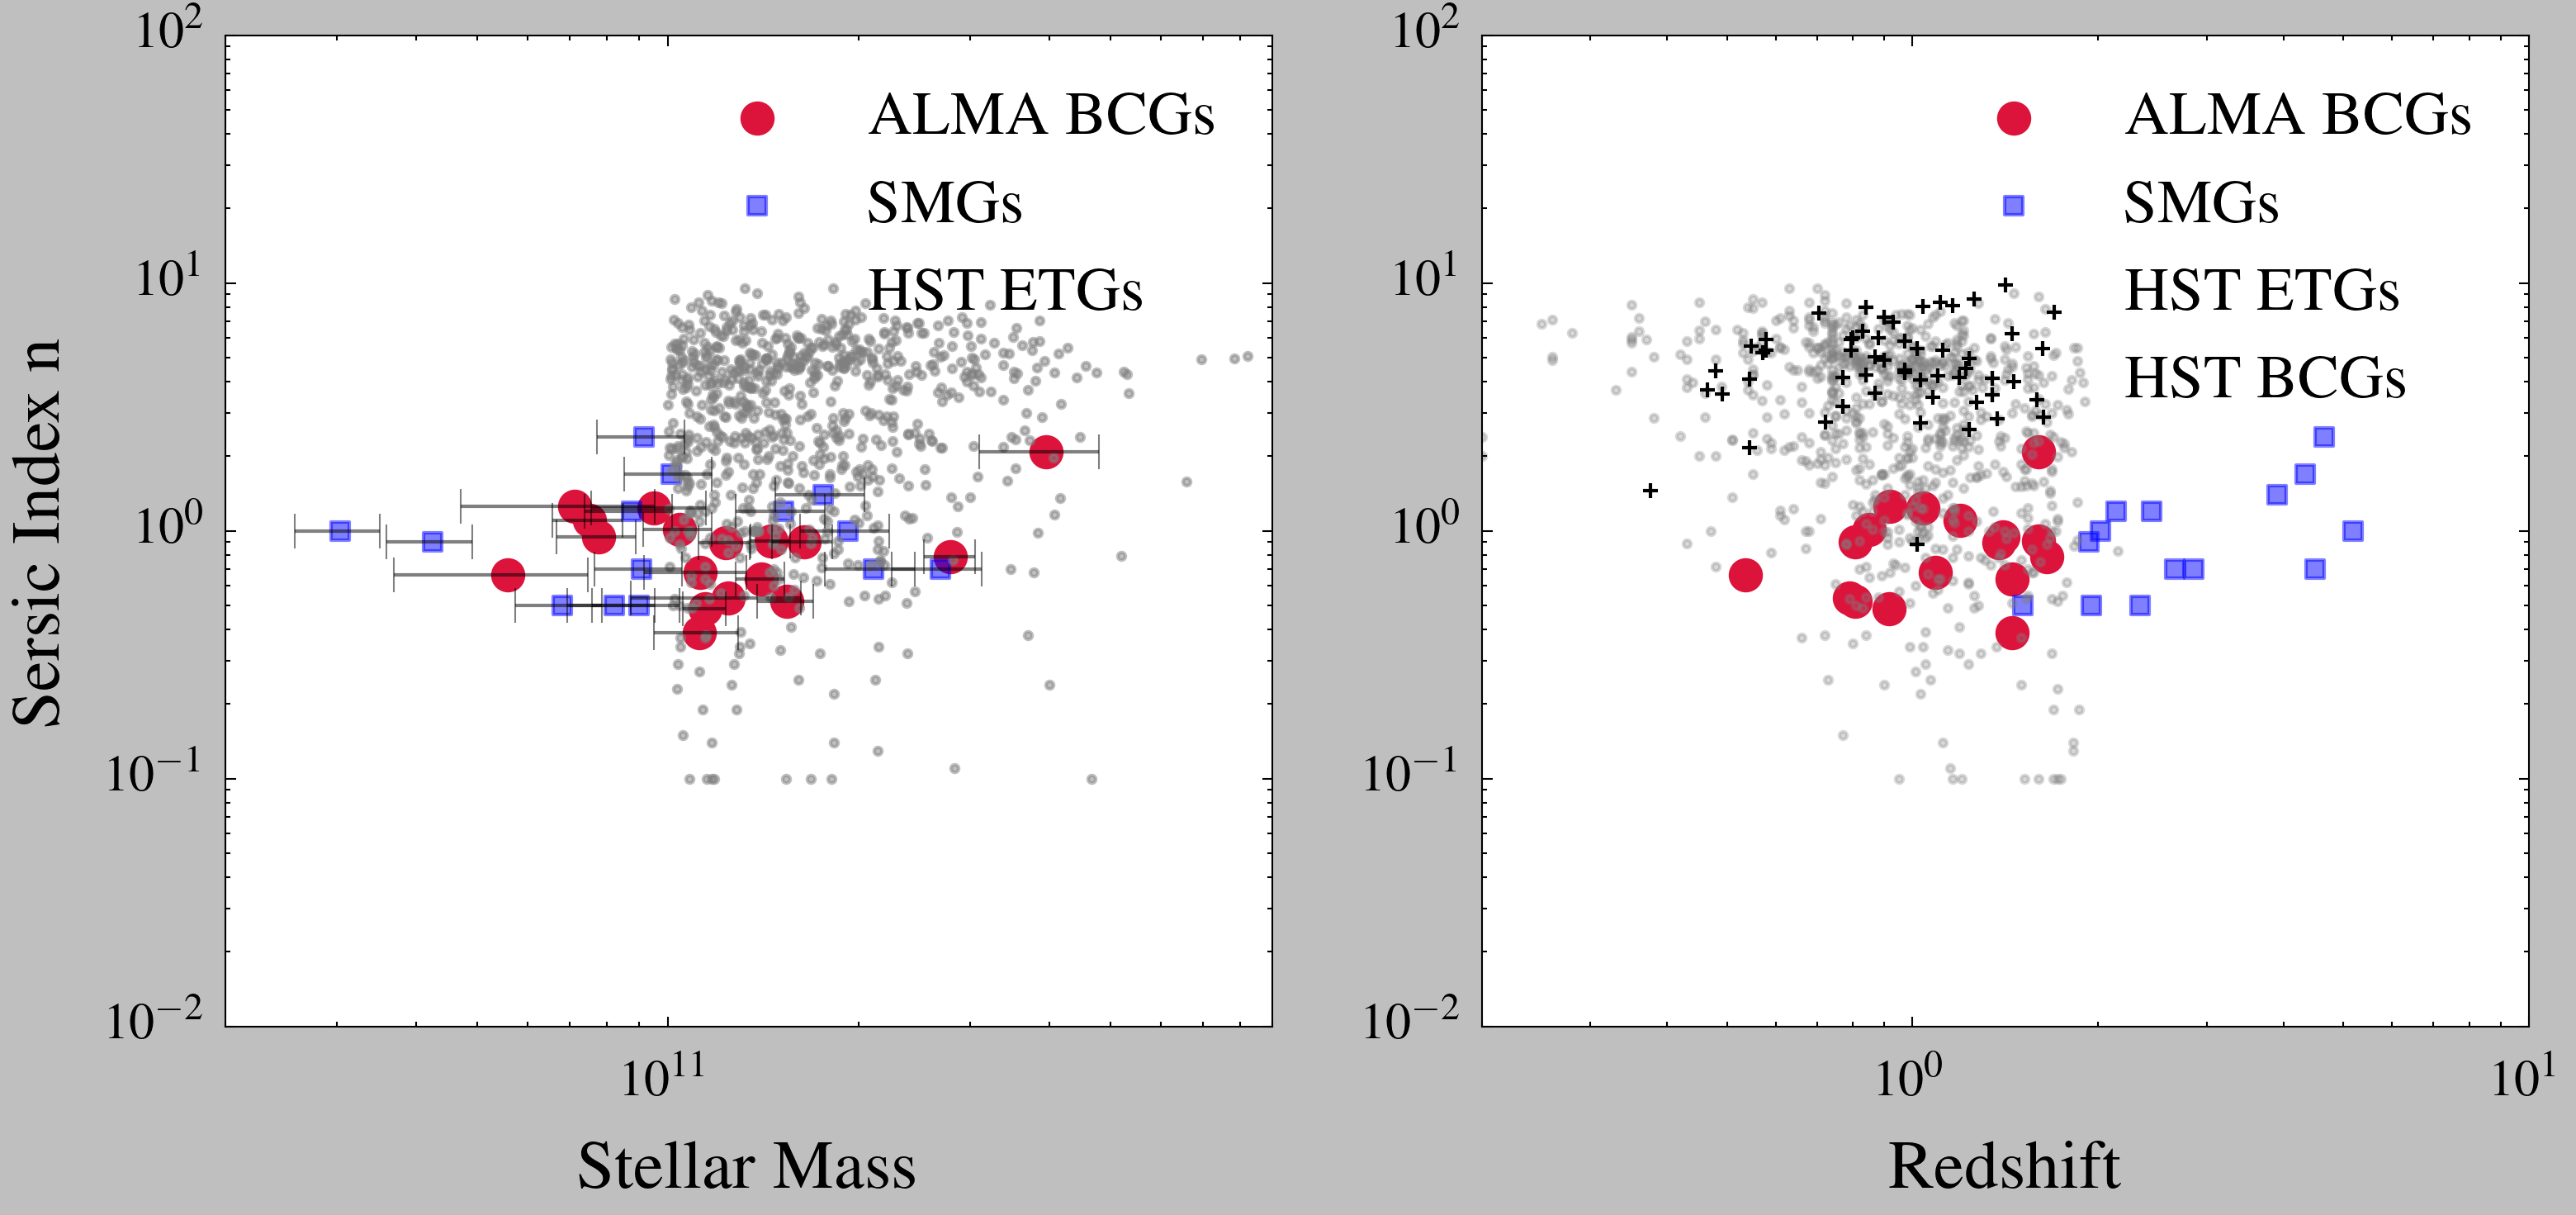

In [130]:
plt.style.use("science")
fig,ax = plt.subplots(1,2, figsize = (12,5), dpi = 300)
ax[0].scatter(final_results['Stellar_mass'], final_results['sersic_n'], marker = 'o', s = 80, color = 'crimson', label = "ALMA BCGs")
ax[0].errorbar(final_results['Stellar_mass'], final_results['sersic_n'], xerr = final_results['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax[0].scatter(10**hodge_smg['stellar_mass'], hodge_smg['n'], marker = 's',s = 30, color = 'blue', alpha = 0.5, label = "SMGs")
ax[0].errorbar(10**hodge_smg['stellar_mass'], hodge_smg['n'], xerr = (10**(hodge_smg['stellar_mass'] + hodge_smg['stellar_mass_err']) - 10**(hodge_smg['stellar_mass'])),ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax[0].scatter(etg['stellar_mass'] * 10**10, etg['n'], color = 'grey', marker = '.', alpha = 0.5, label = "HST ETGs")
ax[0].set_ylabel("Sersic Index n")
ax[0].set_xlabel("Stellar Mass")
ax[0].set_xscale('log')
ax[0].legend(scatterpoints=1)
ax[0].set_yscale('log')
# ax[0].set_ylim(10**-1)
ax[0].set_xlim(2*10**10, 9*10**11)

ax[1].scatter(final_results['redshift'], final_results['sersic_n'], marker = 'o', s = 80, color = 'crimson', label = "ALMA BCGs")
ax[1].scatter(hodge_smg['z'], hodge_smg['n'], marker = 's',s = 30, color = 'blue', label = "SMGs", alpha = 0.5)
ax[1].scatter(etg['z'], etg['n'], color = 'grey', marker = '.', alpha = 0.3, label = "HST ETGs")
ax[1].scatter(hst_bcgs['z'], hst_bcgs['n'],  color = 'black', marker = '+', label = 'HST BCGs')
# ax[1].set_ylabel("Effective Radius [kpc]")
ax[1].set_xlabel("Redshift")
ax[1].legend(scatterpoints=1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_xlim(2*10**-1)

plt.savefig("/Users/arames52/bcg_dust_continuum/notebook/plots/sn_mass_plot.jpg", dpi = 300,bbox_inches = "tight")

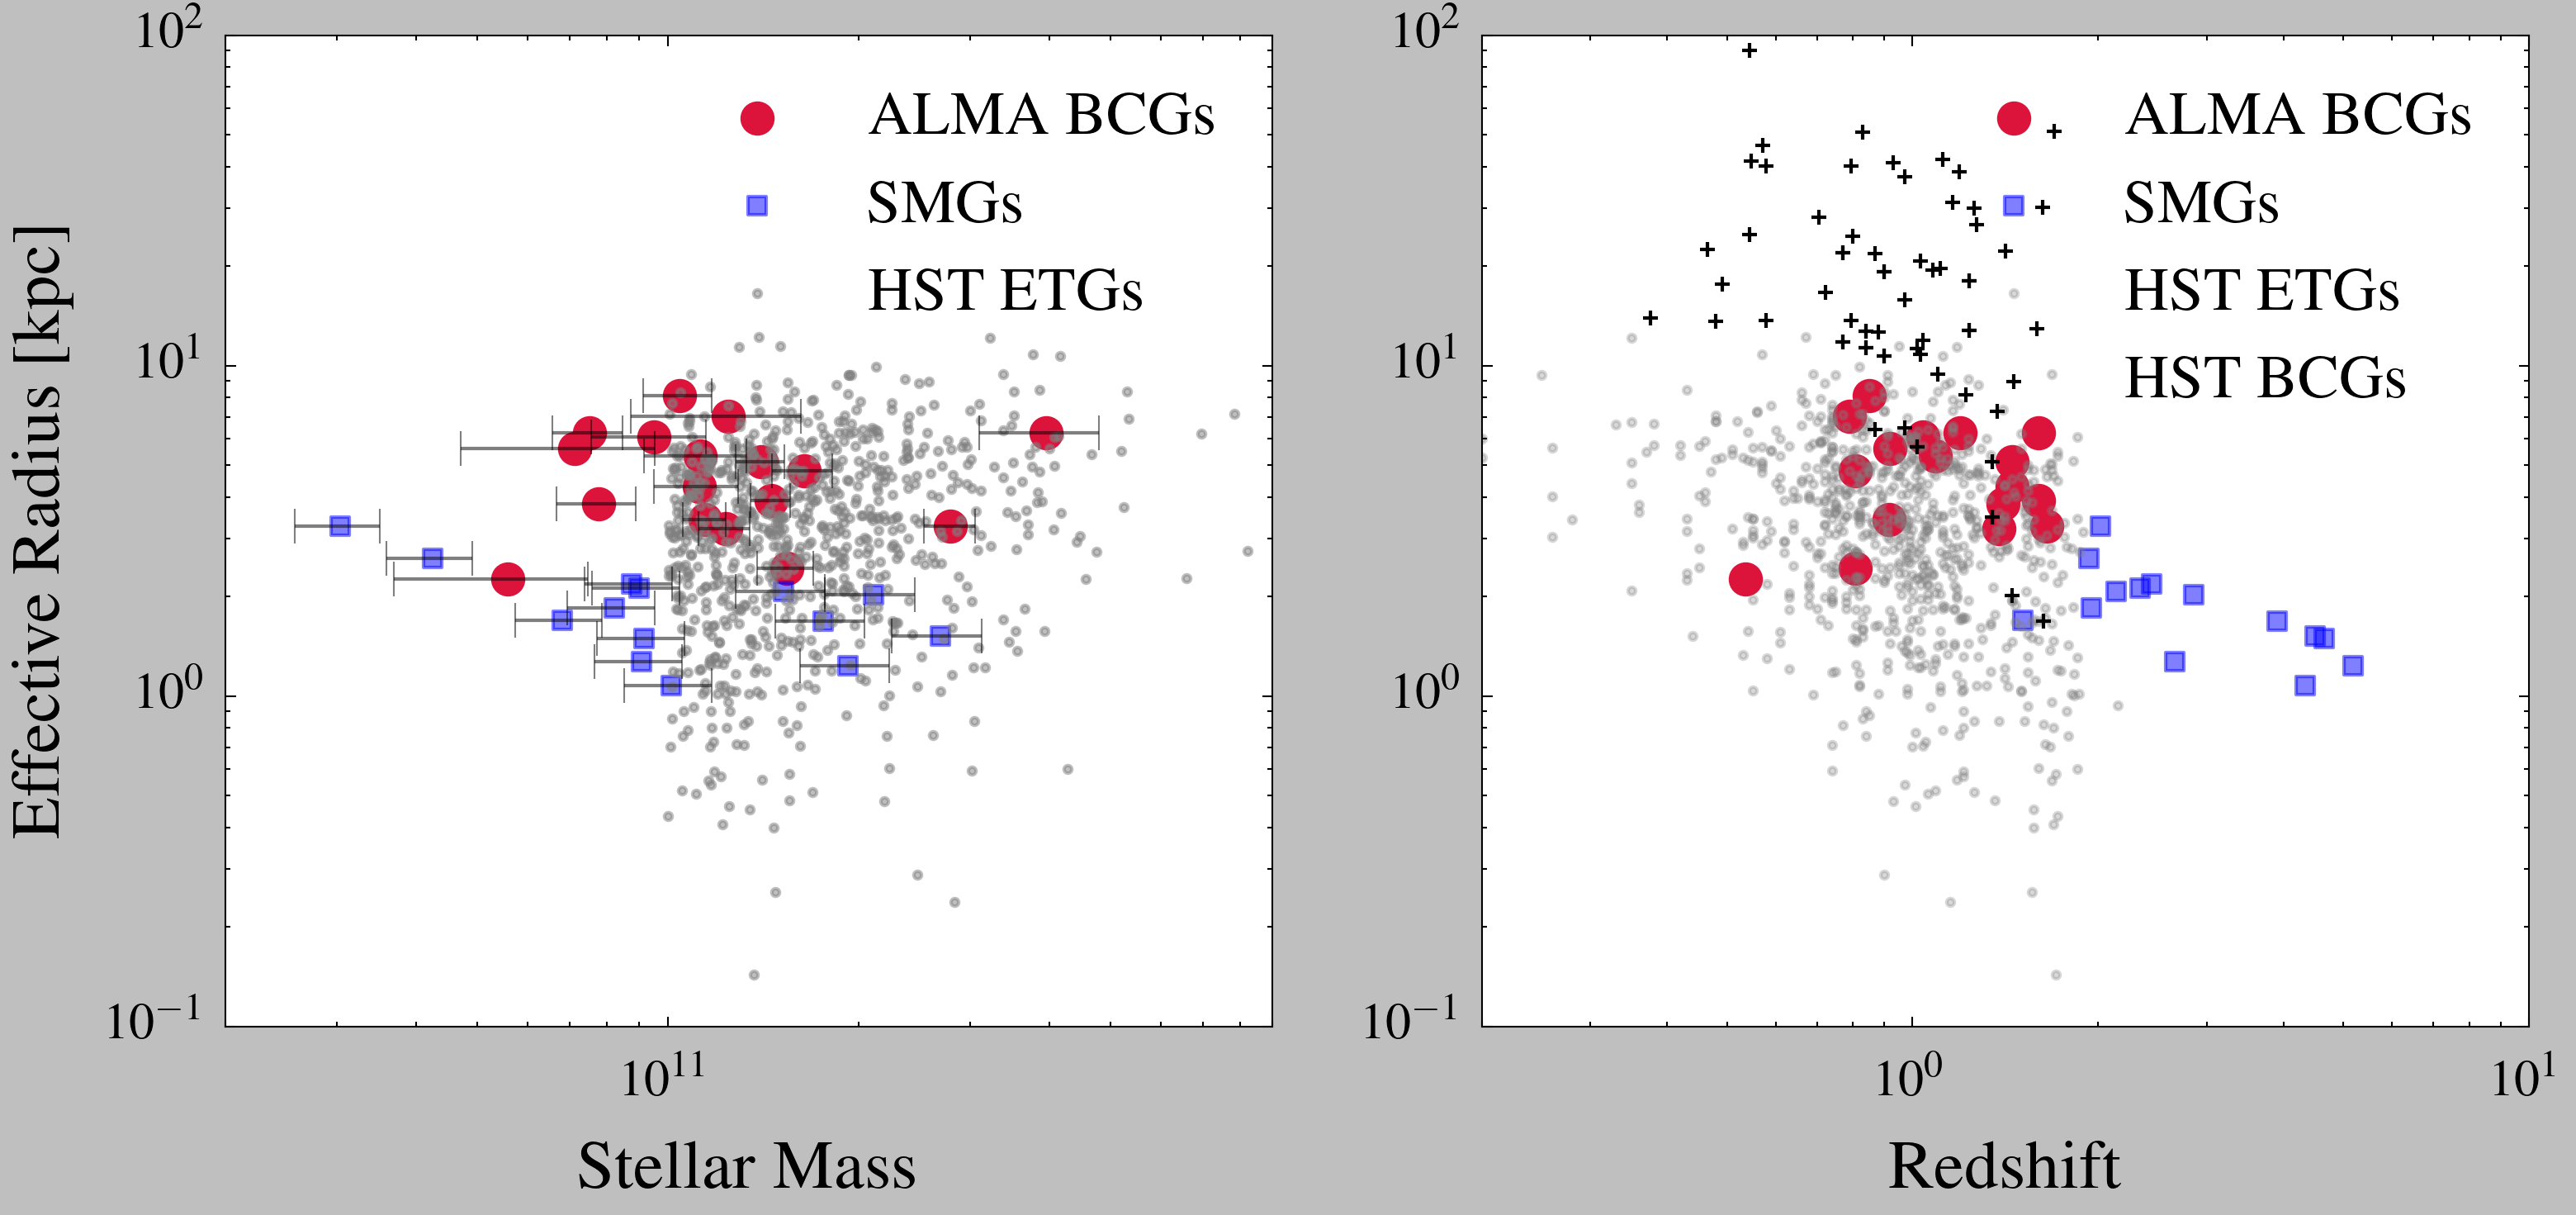

In [131]:
fig,ax = plt.subplots(1,2, figsize = (12,5), dpi = 300)
ax[0].scatter(final_results['Stellar_mass'], final_results['sersic_re'], marker = 'o', s = 80, color = 'crimson', label = "ALMA BCGs")
ax[0].errorbar(final_results['Stellar_mass'], final_results['sersic_re'], xerr = final_results['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax[0].scatter(10**hodge_smg['stellar_mass'], hodge_smg['Re_kpc'], marker = 's',s = 30, color = 'blue', alpha = 0.5, label = "SMGs")
ax[0].errorbar(10**hodge_smg['stellar_mass'], hodge_smg['Re_kpc'], xerr = (10**(hodge_smg['stellar_mass'] + hodge_smg['stellar_mass_err']) - 10**(hodge_smg['stellar_mass'])),ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax[0].scatter(etg['stellar_mass'] * 10**10, etg['re_kpc'], color = 'grey', marker = '.', alpha = 0.5, label = "HST ETGs")
ax[0].set_ylabel("Effective Radius [kpc]")
ax[0].set_xlabel("Stellar Mass")
ax[0].set_xscale('log')
ax[0].legend(scatterpoints=1)
ax[0].set_yscale('log')
ax[0].set_ylim(10**-1)
ax[0].set_xlim(2*10**10, 9*10**11)

ax[1].scatter(bcg_info['redshift'], bcg_info['sersic_re'], marker = 'o', s = 80, color = 'crimson', label = "ALMA BCGs")
ax[1].scatter(hodge_smg['z'], hodge_smg['Re_kpc'], marker = 's',s = 30, color = 'blue', label = "SMGs", alpha = 0.5)
ax[1].scatter(etg['z'], etg['re_kpc'], color = 'grey', marker = '.', alpha = 0.3, label = "HST ETGs")
ax[1].scatter(hst_bcgs['z'], hst_bcgs['re'],  color = 'black', marker = '+', label = 'HST BCGs')
# ax[1].set_ylabel("Effective Radius [kpc]")
ax[1].set_xlabel("Redshift")
ax[1].legend(scatterpoints=1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_ylim(10**-1, 10**2)
ax[1].set_xlim(2*10**-1)

plt.savefig("/Users/arames52/bcg_dust_continuum/notebook/plots/re_plot.jpg", dpi = 300,bbox_inches = "tight")

(20000000000, 900000000000)

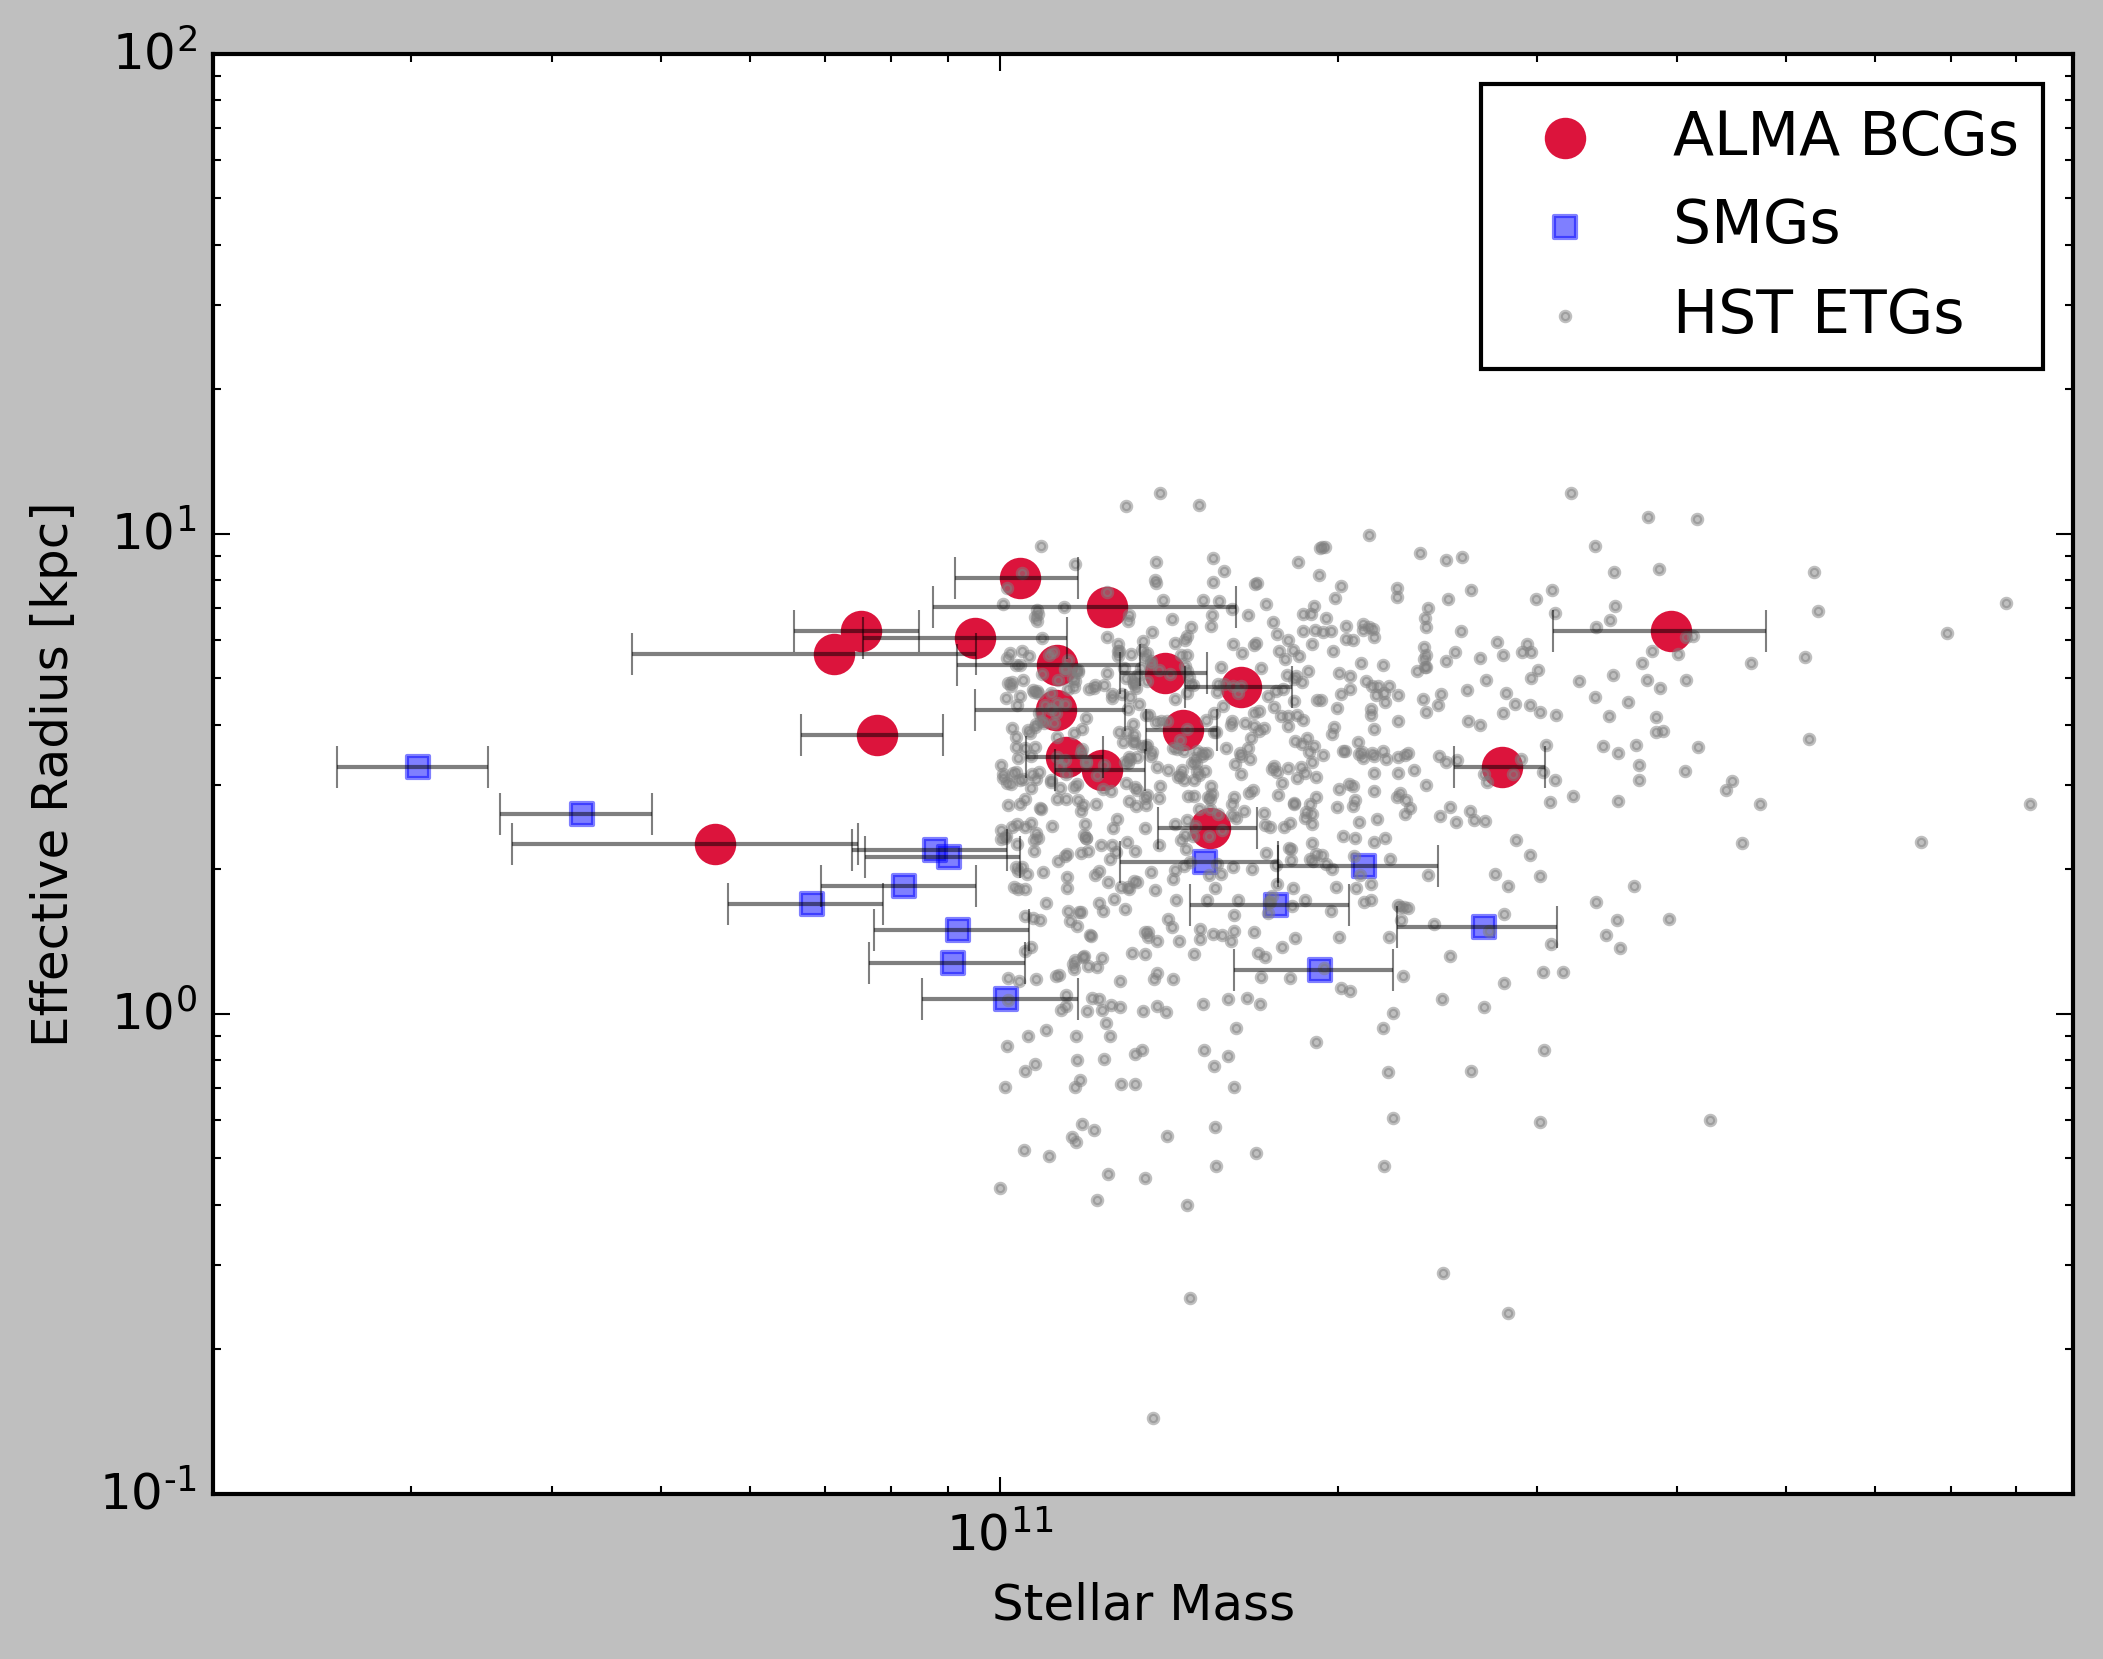

In [38]:
from palettable.scientific.diverging import Berlin_19
fig,ax = plt.subplots(1,1,dpi = 300)
im = ax.scatter(bcg_info['Stellar_mass'], bcg_info['sersic_re'], marker = 'o', s = 80, color = 'crimson', label = "ALMA BCGs")
ax.errorbar(bcg_info['Stellar_mass'], bcg_info['sersic_re'], xerr = bcg_info['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax.scatter(10**hodge_smg['stellar_mass'], hodge_smg['Re_kpc'], marker = 's',s = 30, color = 'blue', alpha = 0.5, label = "SMGs")
ax.errorbar(10**hodge_smg['stellar_mass'], hodge_smg['Re_kpc'], xerr = (10**(hodge_smg['stellar_mass'] + hodge_smg['stellar_mass_err']) - 10**(hodge_smg['stellar_mass'])),ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax.scatter(etg['stellar_mass'] * 10**10, etg['re_kpc'], color = 'grey', marker = '.', alpha = 0.5, label = "HST ETGs")
# ax.scatter(hst_bcgs['M200']*10**14, hst_bcgs['re'],  color = 'black', marker = '+', label = 'HST BCGs')

# cb_ax = fig.add_axes([.91,.124,.04,.754])
# fig.colorbar(im,orientation='vertical',cax=cb_ax)
# cb_ax.set_ylabel("SFR")
ax.set_ylabel("Effective Radius [kpc]")
ax.set_xlabel("Stellar Mass")
ax.set_xscale('log')
ax.legend(scatterpoints=1)
ax.set_yscale('log')
ax.set_ylim(10**-1)
ax.set_xlim(2*10**10, 9*10**11)
# plt.savefig("re_mstar.jpg", dpi = 300,bbox_inches = "tight")

(0.2, 10.0)

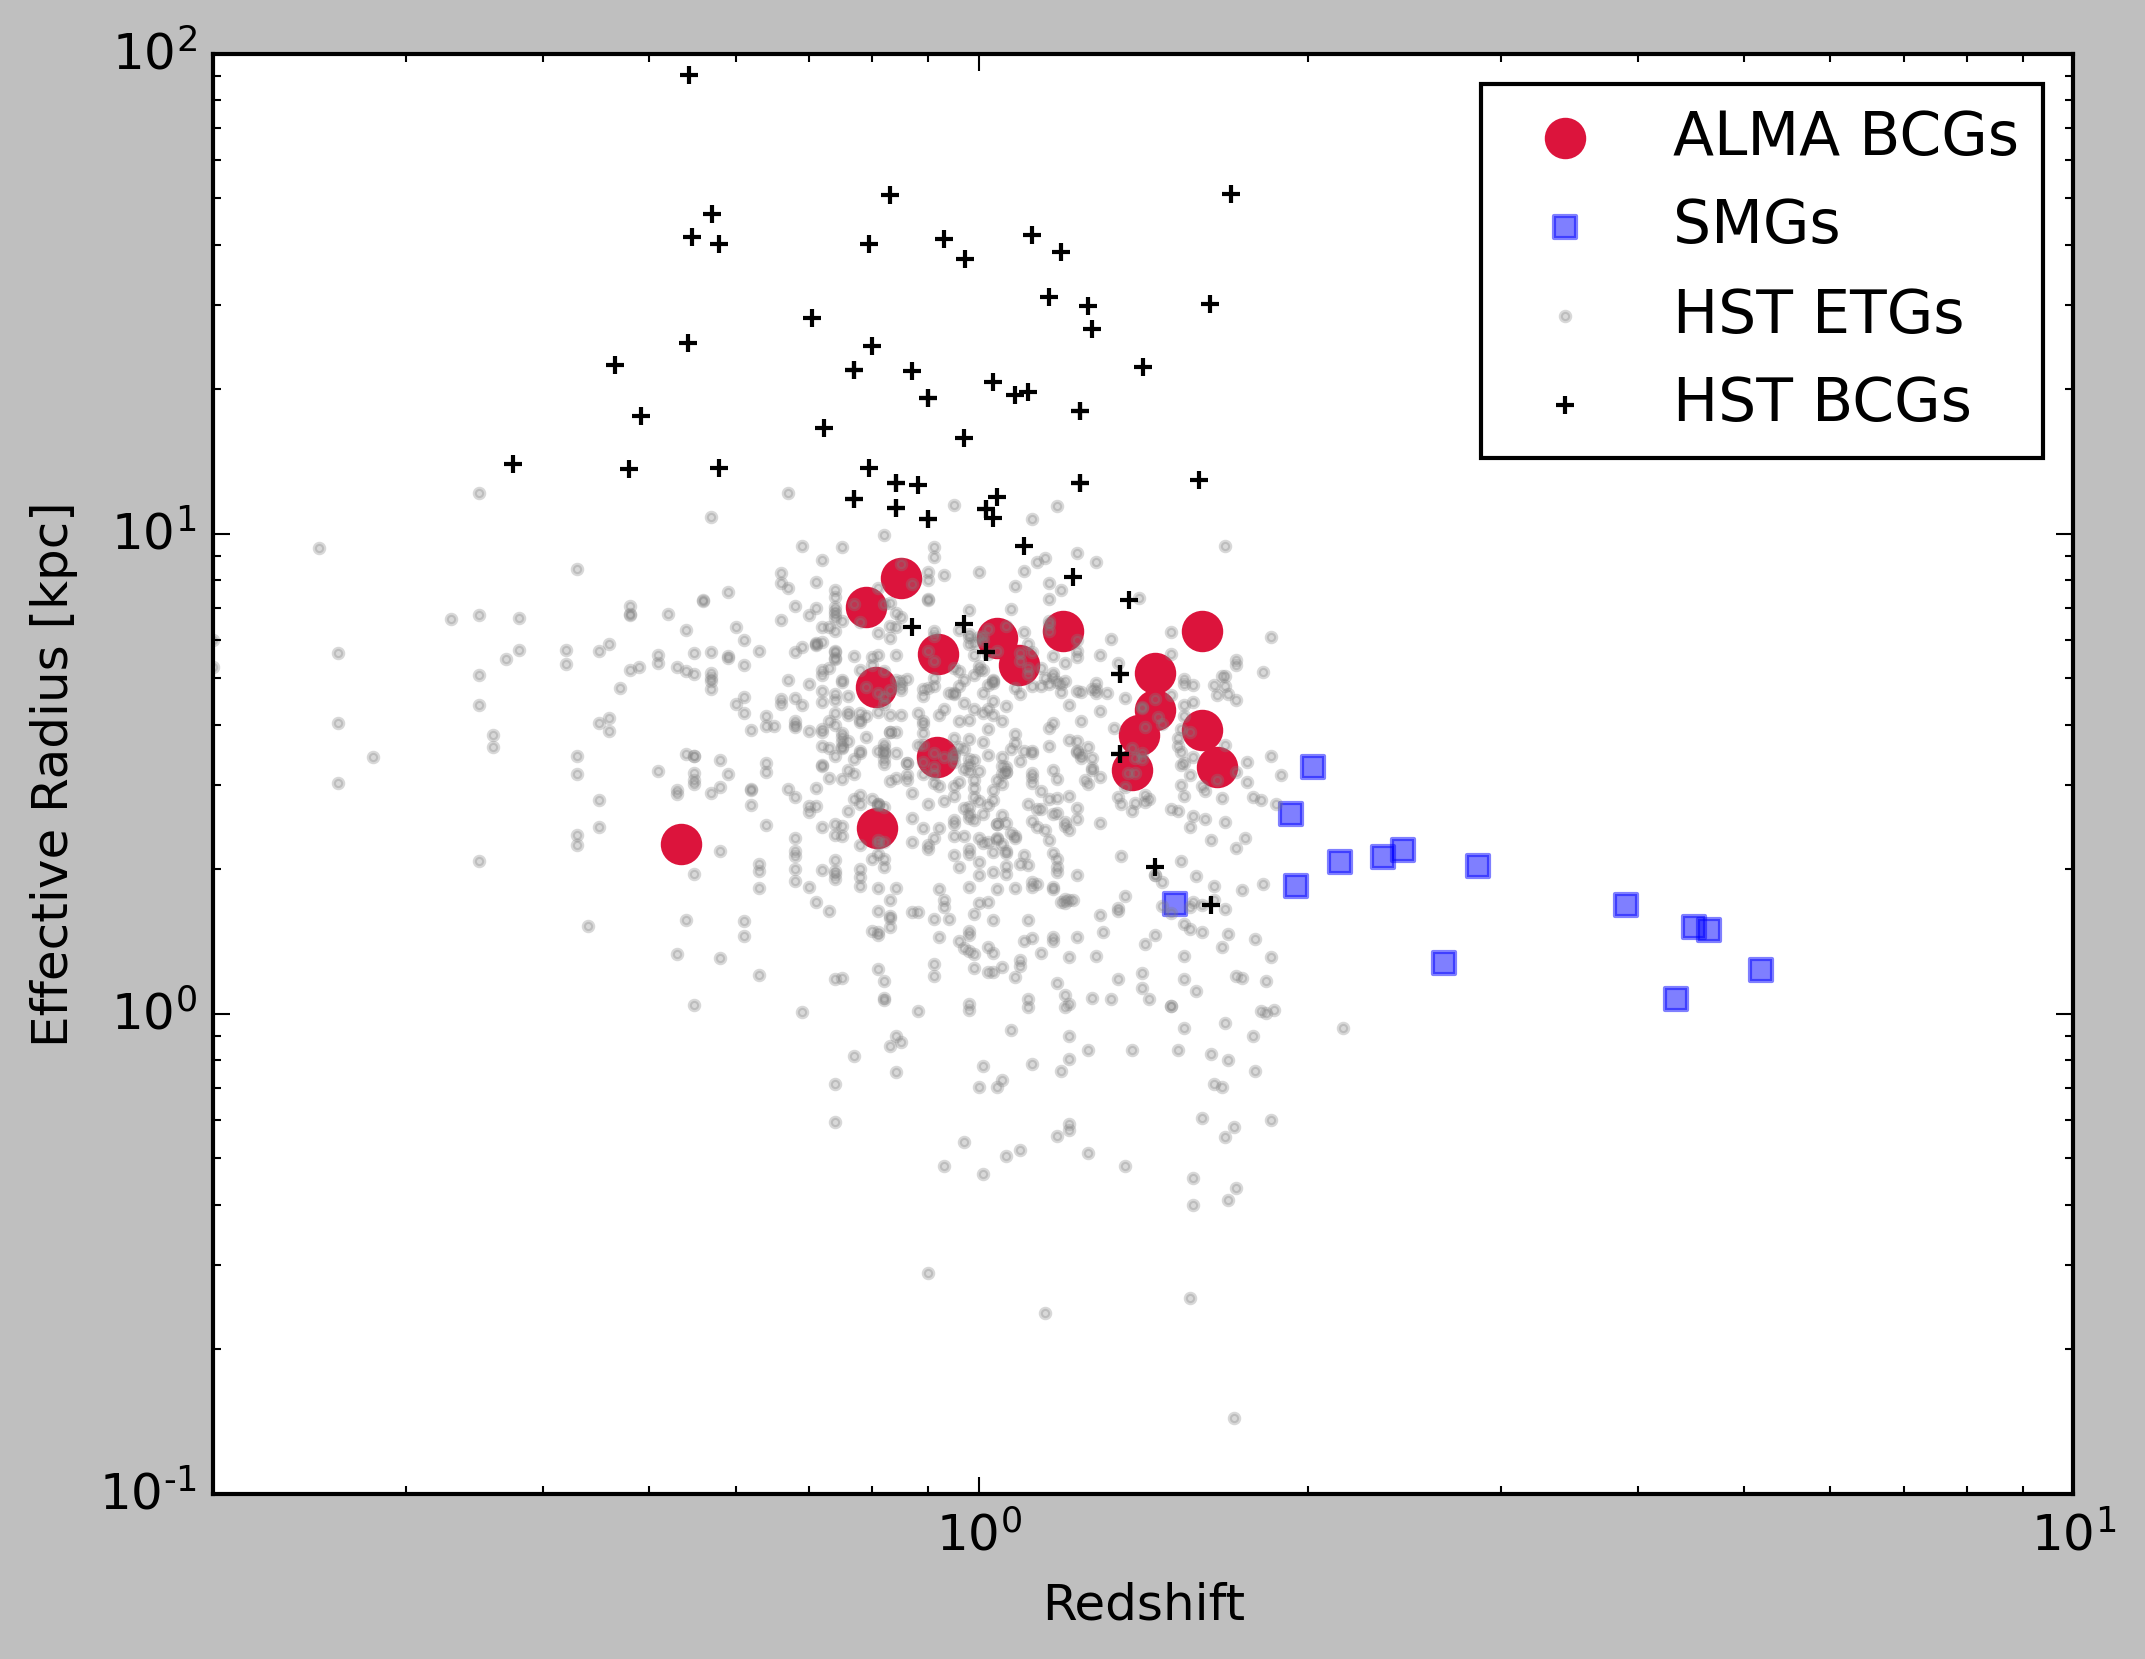

In [39]:
plt.style.use("classic")
fig,ax = plt.subplots(1,1,dpi = 300)
im = ax.scatter(bcg_info['redshift'], bcg_info['sersic_re'], marker = 'o', s = 80, color = 'crimson', label = "ALMA BCGs")
# ax.errorbar(bcg_info['Stellar_mass'], bcg_info['sersic_re'], xerr = bcg_info['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax.scatter(hodge_smg['z'], hodge_smg['Re_kpc'], marker = 's',s = 30, color = 'blue', label = "SMGs", alpha = 0.5)
# ax.errorbar(10**hodge_smg['stellar_mass'], hodge_smg['Re_kpc'], xerr = (10**(hodge_smg['stellar_mass'] + hodge_smg['stellar_mass_err']) - 10**(hodge_smg['stellar_mass'])),ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
ax.scatter(etg['z'], etg['re_kpc'], color = 'grey', marker = '.', alpha = 0.3, label = "HST ETGs")
ax.scatter(hst_bcgs['z'], hst_bcgs['re'],  color = 'black', marker = '+', label = 'HST BCGs')
# cbar = plt.colorbar(im, ax = ax)
# cbar.ax.set_ylabel("SFR")
ax.set_ylabel("Effective Radius [kpc]")
ax.set_xlabel("Redshift")
# ax.set_xscale('log')
ax.legend(scatterpoints=1)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(10**-1, 10**2)
ax.set_xlim(2*10**-1)
# plt.savefig("re_z.jpg", dpi = 300)

In [81]:
np.median(hst_bcgs['re'])

14.893

In [84]:
np.median(bcg_info['sersic_re'])

4.800420480370992

In [98]:
0.7 * 14

9.799999999999999

In [127]:
# plt.style.use("default")
# fig, ax = plt.subplots(1,1,dpi = 300)
# im = ax.scatter(np.log10(bcg_info['Stellar_mass'][subMS]), bcg_info['sersic_re'][subMS], marker = 'o', vmin = vmin, vmax = vmax, c = bcg_info['rest_wave'][subMS], cmap = "magma", label = "subMS BCGs")
# ax.scatter(np.log10(bcg_info['Stellar_mass'][MS]), bcg_info['sersic_re'][MS], marker = 'p', vmin = vmin, vmax = vmax, c = bcg_info['rest_wave'][MS], cmap = "magma", label = "MS BCGs")
# ax.scatter(np.log10(bcg_info['Stellar_mass'][SB]), bcg_info['sersic_re'][SB], marker = 'v', vmin = vmin, vmax = vmax, c = bcg_info['rest_wave'][SB], cmap = "magma", label = "SB BCGs")
# # plt.errorbar(np.log10(bcg_info['Stellar_mass']), bcg_info['sersic_re'], xerr = np.log10(bcg_info['Stellar_mass_err']),ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
# # plt.xscale('log')
# ax.scatter(hodge_smg['stellar_mass'], hodge_smg['Re_kpc'], marker = '*',vmin = vmin, vmax = vmax, c = hodge_smg['rest_wave'], cmap = "magma", label = "SMGs")
# # plt.errorbar(10**hodge_smg['stellar_mass'], hodge_smg['Re_kpc'], xerr = 10**hodge_smg['stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
# cbar = plt.colorbar(im, ax = ax)
# cbar.ax.set_ylabel("Rest Wavelength [mm]")
# ax.set_ylabel("Effective Radius [kpc]")
# ax.set_xlabel("Stellar Mass")
# ax.legend()
# # plt.yscale('log')
# # plt.savefig("/Users/arames52/Research/Analysis/Plots/bcgs_smgs_comp.jpg", dpi = 300)

In [128]:
# plt.style.use("default")
# fig, ax = plt.subplots(1,1,dpi = 300)
# im = ax.scatter(bcg_info['Stellar_mass'][subMS], bcg_info['sersic_n'][subMS], marker = 'o', c = bcg_info['sSFR_gyr'][subMS], cmap = "magma", label = "subMS BCGs")
# ax.scatter(bcg_info['Stellar_mass'][MS], bcg_info['sersic_n'][MS], marker = 'p', c = bcg_info['sSFR_gyr'][MS], cmap = "magma", label = "MS BCGs")
# ax.scatter(bcg_info['Stellar_mass'][SB], bcg_info['sersic_n'][SB], marker = 'v', c = bcg_info['sSFR_gyr'][SB], cmap = "magma", label = "SB BCGs")
# plt.errorbar(bcg_info['Stellar_mass'], bcg_info['sersic_n'], xerr = bcg_info['Stellar_mass_err'],ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)
# cbar = plt.colorbar(im, ax = ax)
# cbar.ax.set_ylabel("sSFR")
# ax.set_ylabel("Sersic Index n")
# ax.set_xlabel("Stellar Mass")
# ax.legend()
# ax.set_xscale('log')

# ETGs

Galaxy ID     Ks    ae     n  epsilon  stellar_mass     z        R.A.  \
1     12004106  17.13  0.80  6.72     0.11         26.72  0.74  214.379730   
3     12004443  17.06  0.48  5.04     0.21         26.96  0.77  214.318298   
8     12007872  17.70  1.21  0.35     0.63         13.47  0.80  214.427551   
12    12008184  17.37  0.93  3.32     0.47         27.07  0.75  214.387024   
13    12008228  17.74  0.23  4.46     0.82         13.19  0.74  214.350021   
..         ...    ...   ...   ...      ...           ...   ...         ...   
790   13102028  17.93  0.76  5.88     0.07         12.77  0.90  215.137283   
791   14002856  18.46  0.81  0.24     0.33         40.05  1.50  215.322479   
793   14007876  18.87  0.15  4.91     0.20         20.11  1.41  215.324188   
794   14007997  17.98  0.39  4.59     0.28         18.66  0.87  215.307083   
795   14008053  18.28  0.26  7.48     0.41         14.12  0.94  215.325653   

          Dec.  Spec.        re    re_kpc  stellar_mass_log  rest_wave  
1    52.443295      1  0.754718  5.510204         11.426836   0.000466  
3    52.429092      1  0.426633  3.160582         11.430720   0.000458  
8    52.479439      0  0.736014  5.525833         11.129368   0.000450  
12   52.493938      0  0.677050  4.967929         11.432488   0.000463  
13   52.503574      0  0.097581  0.712437         11.120245   0.000466  
..         ...    ...       ...       ...               ...        ...  
790  53.089458      1  0.732917  5.709741         11.106191   0.000426  
791  53.248005      0  0.663014  5.610105         11.602603   0.000324  
793  53.291809      0  0.134164  1.131744         11.303412   0.000336  
794  53.292236      1  0.330926  2.552456         11.270912   0.000433  
795  53.290066      0  0.199710  1.574621         11.149835   0.000418  

[638 rows x 14 columns]

# HST BCGs

In [141]:
hst_bcgs

name  class_x   model     mag  mean_sb      re     n  \
0           XDCPJ0044-2033        1  Sersic -25.073   23.119  12.944  3.39   
1             CLJ0152-1357        1  Sersic -24.859   23.471  21.802  3.59   
2   CLJ015244.18-135715.84        2  Sersic -24.378   22.698  12.740  4.24   
3   CLJ015244.18-135715.84        2  Sersic -24.378   22.698  12.740  4.24   
4   CLJ015244.18-135715.84        1  Sersic -24.478   22.343  11.331  7.96   
5   CLJ015244.18-135715.84        1  Sersic -24.478   22.343  11.331  7.96   
6            RCSJ0220-0333        1  Sersic -24.511   23.111  10.804  4.08   
7            RCSJ0221-0321        1  Sersic -23.916   22.257   5.667  0.88   
8            RCSJ0221-0321        1  Sersic -23.916   22.257   5.667  0.88   
9            RCSJ0221-0321        2  Sersic -24.566   23.098  11.261  5.43   
10           RCSJ0221-0321        2  Sersic -24.566   23.098  11.261  5.43   
11          XLSSJ0223-0436        1  Sersic -24.675   23.103   8.146  4.52   
12            SpARCS-J0224        1  Sersic -24.905   18.918   1.682  2.87   
13            SpARCS-J0330        1  Sersic -25.891   24.187  30.167  5.43   
14            RCS0337-2844        1  Sersic -24.102   23.468   9.433  4.21   
15            RCS0439-2904        1  Sersic -24.625   23.598  15.810  5.81   
17        SPT-CLJ0533-5005        1  Sersic -24.463   23.344  12.609  6.03   
18        SPT-CLJ0546-5345        1  Sersic -25.154   25.904  31.178  8.10   
19        SPT-CLJ0615-5746        1  Sersic -26.055   23.471  37.300  4.46   
21          RDCSJ0910+5422        1  Sersic -24.369   24.853  19.696  8.36   
22           MOOJ1014+0038        1  Sersic -25.528   23.814  26.754  3.30   
23               LCDCS0130        1  Sersic -24.316   24.520  28.215  7.59   
24            SpARCS-J1049        1  Sersic -26.550   24.782  51.065  7.63   
25             MS1054-0321        1  Sersic -25.802   24.494  50.904  6.37   
26              RCS1107-05        1  Sersic -25.196   24.795  40.238  5.37   
28              RCS1107-05        1  Sersic -24.280   22.484  13.684  5.94   
30              RCS1122+24        1  Sersic -25.000   23.861  24.589  6.03   
32           MOOJ1142+1527        1  Sersic -26.175   23.799  38.599  4.16   
34          RDCSJ1252-2927        1  Sersic -25.353   23.253  18.022  4.97   
35          RDCSJ1252-2927        1  Sersic -25.353   23.253  18.022  4.97   
36          RDCSJ1252-2927        2  Sersic -24.943   22.918  12.784  2.57   
37          RDCSJ1252-2927        2  Sersic -24.943   22.918  12.784  2.57   
40         WARPSJ1415+3612        1  Sersic -25.351   23.665  20.719  2.73   
42           ISCS1429+3437        1  Sersic -26.150   23.308  29.892  8.65   
43          ISCSJ1432+3436        2  Sersic -24.524   20.430   3.476  4.14   
44          ISCSJ1432+3436        2  Sersic -24.524   20.430   3.476  4.14   
45          ISCSJ1432+3436        1  Sersic -24.714   21.079   5.116  3.53   
46          ISCSJ1432+3436        1  Sersic -24.714   21.079   5.116  3.53   
47        ISCSJ1434.5+3519        1  Sersic -24.979   21.619   7.272  2.84   
48          ISCSJ1438+3414        1  Sersic -25.233   23.866  22.274  9.86   
50              RCS1511+09        1  Sersic -23.975   22.327   6.495  4.35   
51           ClGJ1604+4304        2  Sersic -24.364   22.737  10.716  4.87   
52           ClGJ1604+4304        2  Sersic -24.364   22.737  10.716  4.87   
53           ClGJ1604+4304        1  Sersic -24.724   23.643  19.195  7.29   
54           ClGJ1604+4304        1  Sersic -24.724   23.643  19.195  7.29   
55              RCS1620+29        1  Sersic -23.819   22.501   6.405  5.03   
57        SPT-CLJ2040-5725        1  Sersic -24.933   25.728  41.119  6.96   
58        SPT-CLJ2043-5035        1  Sersic -24.501   23.233  16.648  2.74   
59          XMMUJ2205-0159        1  Sersic -25.794   25.354  42.005  5.36   
60      XMMXCSJ2215.9-1738        1  Sersic -23.698   20.249   2.019  6.25   
62        SPT-CLJ2342-5411        1  Sersic 

Text(0.5, 0, 'Stellar mass')

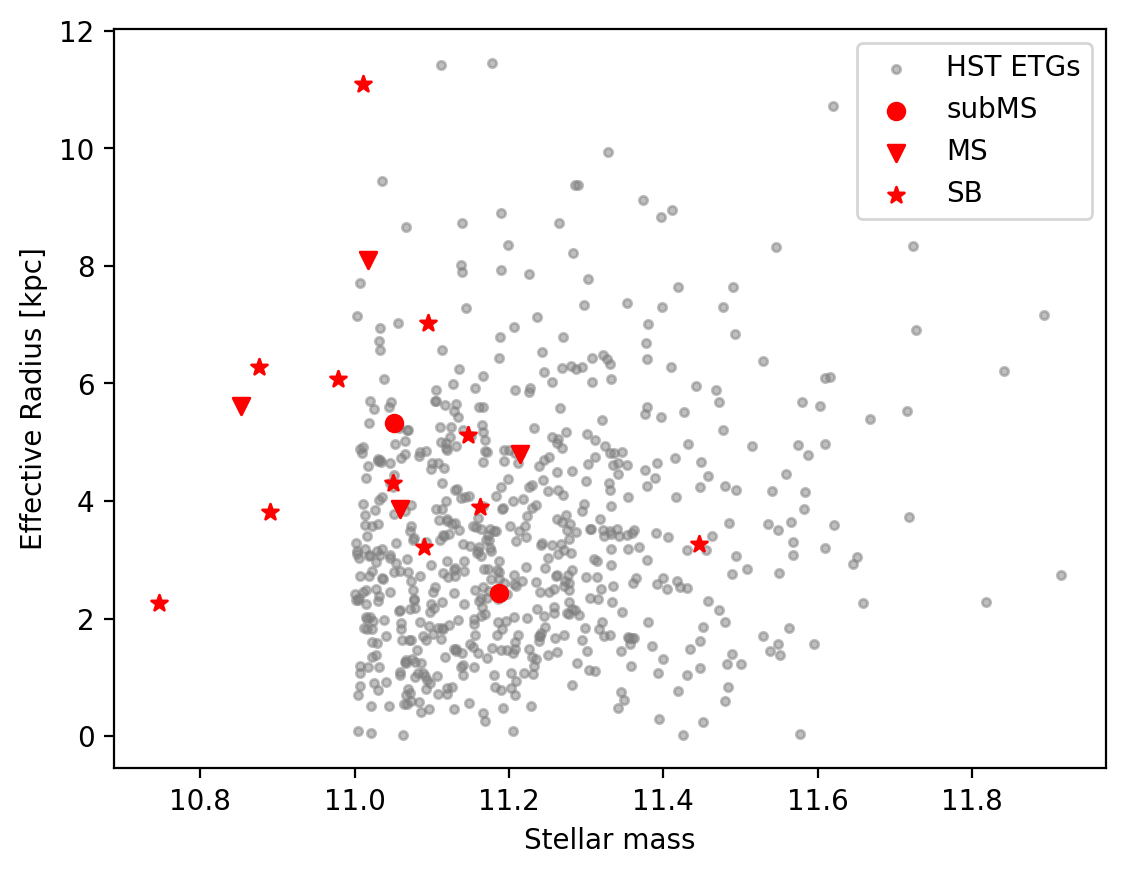

In [555]:
plt.figure(dpi = 200)
# vmin, vmax = min(min(hst_bcgs['rest_wave']), min(etg['rest_wave']), min(bcg_info['rest_wave'])), max(max(hst_bcgs['rest_wave']), max(etg['rest_wave']), max(bcg_info['rest_wave']))
# plt.scatter(hst_bcgs['z'], hst_bcgs['re'], vmin = vmin, vmax = vmax, c = hst_bcgs['rest_wave'], cmap = 'magma', marker = '+', label = 'HST BCGs')
plt.scatter(etg['stellar_mass_log'], etg['re_kpc'], color = 'grey', marker = '.', alpha = 0.5, label = "HST ETGs")
plt.scatter(np.log10(bcg_info['Stellar_mass'][subMS]), bcg_info['sersic_re'][subMS], color = 'red', marker = 'o', label = "subMS")
plt.scatter(np.log10(bcg_info['Stellar_mass'][MS]), bcg_info['sersic_re'][MS], color = 'red', marker = 'v', label = "MS")
plt.scatter(np.log10(bcg_info['Stellar_mass'][SB]), bcg_info['sersic_re'][SB], color = 'red', marker = '*', label = "SB")

# cbar = plt.colorbar()
plt.legend()
plt.ylabel("Effective Radius [kpc]")
plt.xlabel("Stellar mass")
# plt.xscale("log")
# plt.yscale("log")
# cbar.ax.set_ylabel("Rest Wavlength [mm]")
# plt.savefig("/Users/arames52/Research/Analysis/Plots/bcgs_etgs_re_mstar.jpg", dpi = 300)

Text(0.5, 0, 'Redshift')

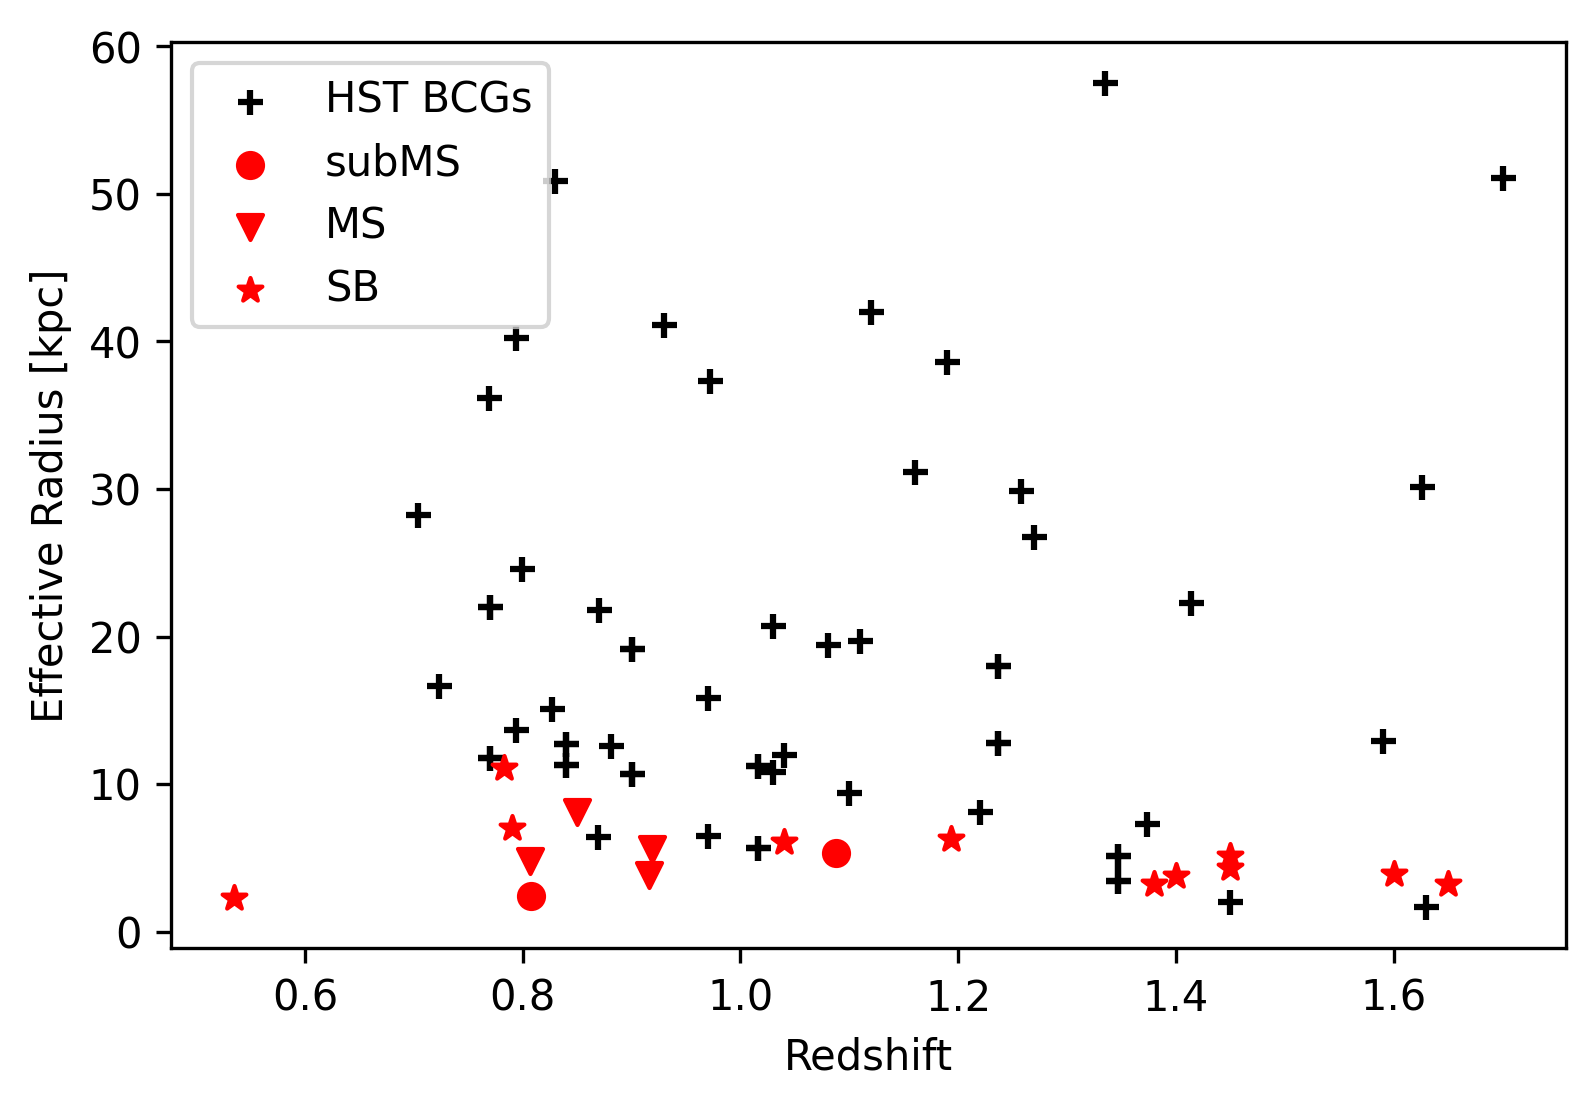

In [559]:
%matplotlib inline
plt.figure(dpi = 300)
plt.scatter(hst_bcgs['z'], hst_bcgs['re'],  color = 'black', marker = '+', label = 'HST BCGs')
# plt.scatter(etg['z'], etg['re_kpc'], vmin = vmin, vmax = vmax, c = etg['rest_wave'], cmap = 'magma', marker = '.', alpha = 0.5, label = "HST ETGs")
plt.scatter(bcg_info['redshift'][subMS], bcg_info['sersic_re'][subMS],  color = 'red', marker = 'o', label = "subMS")
plt.scatter(bcg_info['redshift'][MS], bcg_info['sersic_re'][MS],  color = 'red', marker = 'v', label = "MS")
plt.scatter(bcg_info['redshift'][SB], bcg_info['sersic_re'][SB],  color = 'red', marker = '*', label = "SB")

# cbar = plt.colorbar()
plt.legend()
plt.ylabel("Effective Radius [kpc]")
plt.xlabel("Redshift")
# plt.xscale("log")
# plt.yscale("log")
# cbar.ax.set_ylabel("Rest Wavlength [mm]")
# plt.savefig("/Users/arames52/Research/Analysis/Plots/bcgs_hst_re_z.jpg", dpi = 300)

Text(0.5, 0, 'Redshift')

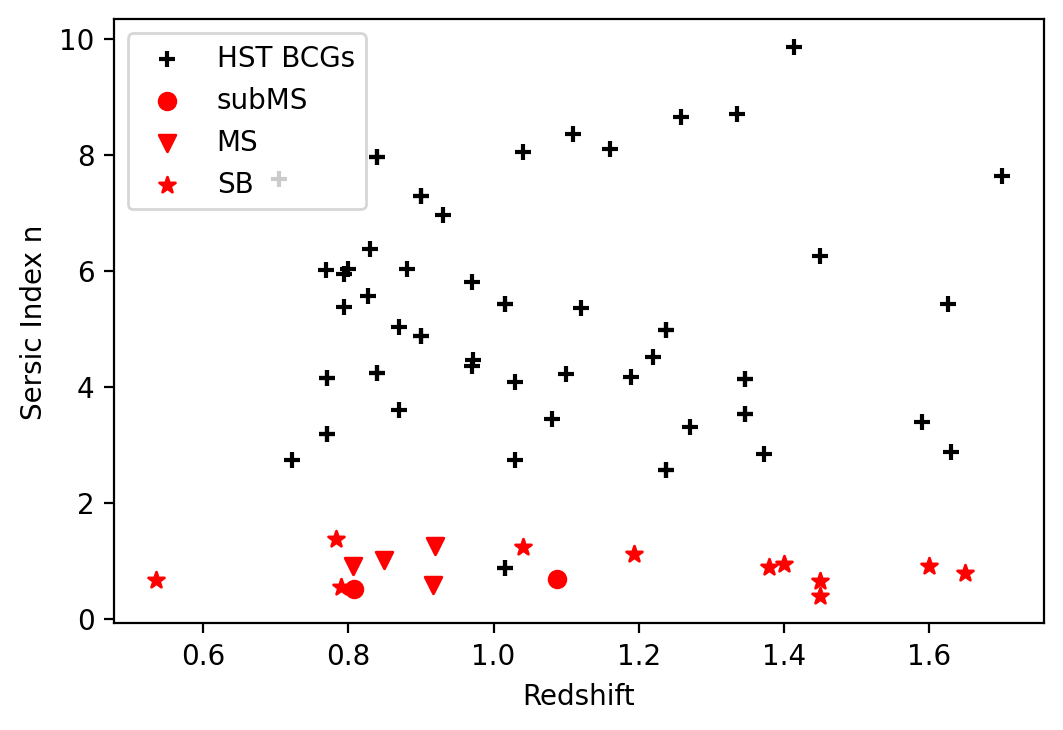

In [560]:
plt.figure(dpi = 200)
plt.scatter(hst_bcgs['z'], hst_bcgs['n'],  color = 'black', marker = '+', label = 'HST BCGs')
# plt.scatter(etg['z'], etg['re_kpc'], vmin = vmin, vmax = vmax, c = etg['rest_wave'], cmap = 'magma', marker = '.', alpha = 0.5, label = "HST ETGs")
plt.scatter(bcg_info['redshift'][subMS], bcg_info['sersic_n'][subMS],  color = 'red', marker = 'o', label = "subMS")
plt.scatter(bcg_info['redshift'][MS], bcg_info['sersic_n'][MS],  color = 'red', marker = 'v', label = "MS")
plt.scatter(bcg_info['redshift'][SB], bcg_info['sersic_n'][SB],  color = 'red', marker = '*', label = "SB")

# cbar = plt.colorbar()
plt.legend()
plt.ylabel("Sersic Index n")
plt.xlabel("Redshift")

In [1]:
256 + 188

444